

```
# This is formatted as code
```
##Loading The Data


In [1]:
#loading the required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the file
loan_df = pd.read_csv('loan.csv')
print("Loan data loaded successfully.")

Loan data loaded successfully.


In [3]:
print(loan_df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [4]:
# Display basic information about the DataFrame
print(loan_df.info())
loan_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


(39717, 111)

In [5]:
# Display descriptive statistics for numerical columns
print(loan_df.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

## Column Cleaning

In [6]:
# Calculate total values and data types for each column
zero_val_col=0
column_info = []
empty_columns_names=[]
for col in loan_df.columns:
    total_values = loan_df[col].count()
    data_type = loan_df[col].dtype
    column_info.append([col, total_values, data_type])
    if total_values==0:
      zero_val_col+=1
      empty_columns_names.append(col)

# Display the information as a list
print("\nColumn Information:")
for col_name, total, data_type in column_info:
    print(f"Column: {col_name}, Total Values: {total}, Data Type: {data_type}")

print("\nTotal Column With 0 values: ")
print(zero_val_col)
print(empty_columns_names)


Column Information:
Column: id, Total Values: 39717, Data Type: int64
Column: member_id, Total Values: 39717, Data Type: int64
Column: loan_amnt, Total Values: 39717, Data Type: int64
Column: funded_amnt, Total Values: 39717, Data Type: int64
Column: funded_amnt_inv, Total Values: 39717, Data Type: float64
Column: term, Total Values: 39717, Data Type: object
Column: int_rate, Total Values: 39717, Data Type: object
Column: installment, Total Values: 39717, Data Type: float64
Column: grade, Total Values: 39717, Data Type: object
Column: sub_grade, Total Values: 39717, Data Type: object
Column: emp_title, Total Values: 37258, Data Type: object
Column: emp_length, Total Values: 38642, Data Type: object
Column: home_ownership, Total Values: 39717, Data Type: object
Column: annual_inc, Total Values: 39717, Data Type: float64
Column: verification_status, Total Values: 39717, Data Type: object
Column: issue_d, Total Values: 39717, Data Type: object
Column: loan_status, Total Values: 39717, Da

In [7]:
#colums to drop
loan_df = loan_df.drop(columns=empty_columns_names)

In [8]:
loan_df.shape

(39717, 57)

In [9]:

# Check for missing values
print((loan_df.isnull().sum()>5000)==True)

#Drop Coumns desc,next_pymnt_d,mths_since_last_delinq,mths_since_last_record
#these columns either have low values like mnths-since_last_ddelig or add little meaning to predicting loan risk

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_title                     False
emp_length                    False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                    False
url                           False
desc                           True
purpose                       False
title                         False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths              

Some of below columns dont add any value to predict loan default:
1. desc - this description of the loan doesnt help
2. next_pymnt_d','mths_since_last_delinq','mths_since_last_record' - These columns wont add any value
3. pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt' also have been removed
4. Some columns like "id", "member_id", "url", "title", "emp_title" are redundant

In [10]:
#Some the below columns are not relevant henc
loan_df.drop(columns=['desc','next_pymnt_d','mths_since_last_delinq','mths_since_last_record'], axis = 1, inplace = True)

In [11]:
#these columns contribute very little to our analysis hence dropping these columns as well
loan_df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)


In [12]:
#these columns contribute very little to our analysis hence dropping these columns as well
loan_df.drop(['id', 'member_id', 'url', 'title', 'emp_title' ], axis = 1, inplace = True)



Other columns deleted
"last_credit_pull_d","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "chargeoff_within_12_mths"

These columns are not related to loan default




In [13]:
loan_df.drop(["last_credit_pull_d","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "chargeoff_within_12_mths"], axis = 1, inplace = True)

In [14]:
loan_df.to_csv('loan_data_updated.csv', index=False)


In [15]:
#this column was created for null check
loan_df.drop(columns=['pub_rec'], axis = 1, inplace = True)

In [16]:
loan_df.shape

(39717, 22)


## Row Cleaning

In [17]:
# Define a function to count nulls in a row
def count_nulls(row):
    return row.isnull().sum()

# Apply the function to each row
loan_df['null_count'] = loan_df.apply(count_nulls, axis=1)

# Filter and display as in the previous approach
rows_with_nulls = loan_df[loan_df['null_count'] >5]
loan_df = loan_df[loan_df['null_count'] <5]

# Reset the index (optional but recommended)
loan_df = loan_df.reset_index(drop=True)

print(rows_with_nulls[['null_count']])  # Display other relevant columns as needed
print(loan_df)
#Very Few rows with null count greater than 5 (10 % columns post cleaning) after column cleaning.
#No rows to be cleaned

Empty DataFrame
Columns: [null_count]
Index: []
       loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0           5000           4975.0   36 months   10.65%       162.87     B   
1           2500           2500.0   60 months   15.27%        59.83     C   
2           2400           2400.0   36 months   15.96%        84.33     C   
3          10000          10000.0   36 months   13.49%       339.31     C   
4           3000           3000.0   60 months   12.69%        67.79     B   
...          ...              ...         ...      ...          ...   ...   
39712       2500           1075.0   36 months    8.07%        78.42     A   
39713       8500            875.0   36 months   10.28%       275.38     C   
39714       5000           1325.0   36 months    8.07%       156.84     A   
39715       5000            650.0   36 months    7.43%       155.38     A   
39716       7500            800.0   36 months   13.75%       255.43     E   

      sub_grade emp_length 

In [18]:
#this column was created for null check
loan_df.drop(columns=['null_count'], axis = 1, inplace = True)

In [19]:
#Loan Amount and funded amnt Inv are similar, the final loan funded column is actual loan amount
#drop Loan Amount
loan_df.drop(columns=['loan_amnt'], axis = 1, inplace = True)

In [20]:

# Filter out rows where 'loan_status' is 'Current'
# Loans which are current wont help in identifying risk
# loan_df = loan_df[loan_df['loan_status'] != 'Current']

# # Display the updated DataFrame (optional)
# print(loan_df.head())
# loan_df.shape

In [21]:
#Final DF and its columns
print(loan_df.shape)
loan_df.columns

(39717, 21)


Index(['funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'revol_util', 'total_acc'],
      dtype='object')

In [22]:
loan_df.head()


,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_acc
0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,Fully Paid,credit_card,860xx,AZ,27.65,Jan-85,1,3,83.70%,9
1,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,Charged Off,car,309xx,GA,1.00,Apr-99,5,3,9.40%,4
2,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,Fully Paid,small_business,606xx,IL,8.72,Nov-01,2,2,98.50%,10
3,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,Fully Paid,other,917xx,CA,20.00,Feb-96,1,10,21%,37
4,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,Current,other,972xx,OR,17.94,Jan-96,0,15,53.90%,38


###Treat Missing Values

In [23]:
(loan_df.isna().sum()/len(loan_df.index))*100

,0
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_length,2.706650
home_ownership,0.000000
annual_inc,0.000000
verification_status,0.000000


In [24]:
print(loan_df['emp_length'])
print(loan_df['emp_length'].mode)
#fill the blank values with Mode , for categorical column
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.emp_length.isna().sum()

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object
<bound method Series.mode of 0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object>


0

In [25]:
print(loan_df['revol_util'])
print(loan_df['revol_util'].mode,)
#fill the blank values with Mode , for categorical column
loan_df.revol_util.fillna(loan_df.revol_util.mode()[0], inplace = True)
loan_df.revol_util.isna().sum()

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object
<bound method Series.mode of 0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object>


0

Save Cleaned File

In [26]:
loan_df.to_csv('loan_data_cleaned_final.csv', index=False)

##Standardizing Values

In [27]:
#Round the funded_amnt_inv values to 1 decimal place
loan_df['funded_amnt_inv'] = loan_df['funded_amnt_inv'].round(1)
#Remove decimal places from installment, as installment cannot be decimal
loan_df['installment'] = loan_df['installment'].astype(int)

In [28]:
#Convert object types to numbers like term
#extract and add column term and drop term months
loan_df['term_months'] = loan_df['term'].str.extract('(\d+)').astype(int)

#drop Loan Amount
loan_df.drop(columns=['term'], axis = 1, inplace = True)

In [29]:
#convert Int Rate to float
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%').astype(float)

#convert Int Rate to float
#loan_df['revol_util'] = loan_df['revol_util'].str.rstrip('%').astype(float)

In [30]:
def standardize_emp_length(emp_length):
    if pd.isnull(emp_length):
        return emp_length  # Handle missing values
    elif emp_length == '< 1 year':
        return 0
    elif emp_length == '10+ years':
        return 10
    else:
        return int(emp_length.split()[0])  # Extract numerical value

loan_df['emp_length'] = loan_df['emp_length'].apply(standardize_emp_length)


In [31]:
loan_df.head()

,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_acc,term_months
0,4975.0,10.65,162,B,B2,10,RENT,24000.0,Verified,Dec-11,...,credit_card,860xx,AZ,27.65,Jan-85,1,3,83.70%,9,36
1,2500.0,15.27,59,C,C4,0,RENT,30000.0,Source Verified,Dec-11,...,car,309xx,GA,1.00,Apr-99,5,3,9.40%,4,60
2,2400.0,15.96,84,C,C5,10,RENT,12252.0,Not Verified,Dec-11,...,small_business,606xx,IL,8.72,Nov-01,2,2,98.50%,10,36
3,10000.0,13.49,339,C,C1,10,RENT,49200.0,Source Verified,Dec-11,...,other,917xx,CA,20.00,Feb-96,1,10,21%,37,36
4,3000.0,12.69,67,B,B5,1,RENT,80000.0,Source Verified,Dec-11,...,other,972xx,OR,17.94,Jan-96,0,15,53.90%,38,60


In [32]:
loan_df.dtypes

,0
funded_amnt_inv,float64
int_rate,float64
installment,int64
grade,object
sub_grade,object
emp_length,int64
home_ownership,object
annual_inc,float64
verification_status,object
issue_d,object


In [33]:
loan_df.to_csv('loan_data_standardized.csv', index=False)



##Univariate Analysis & Bi- Variate


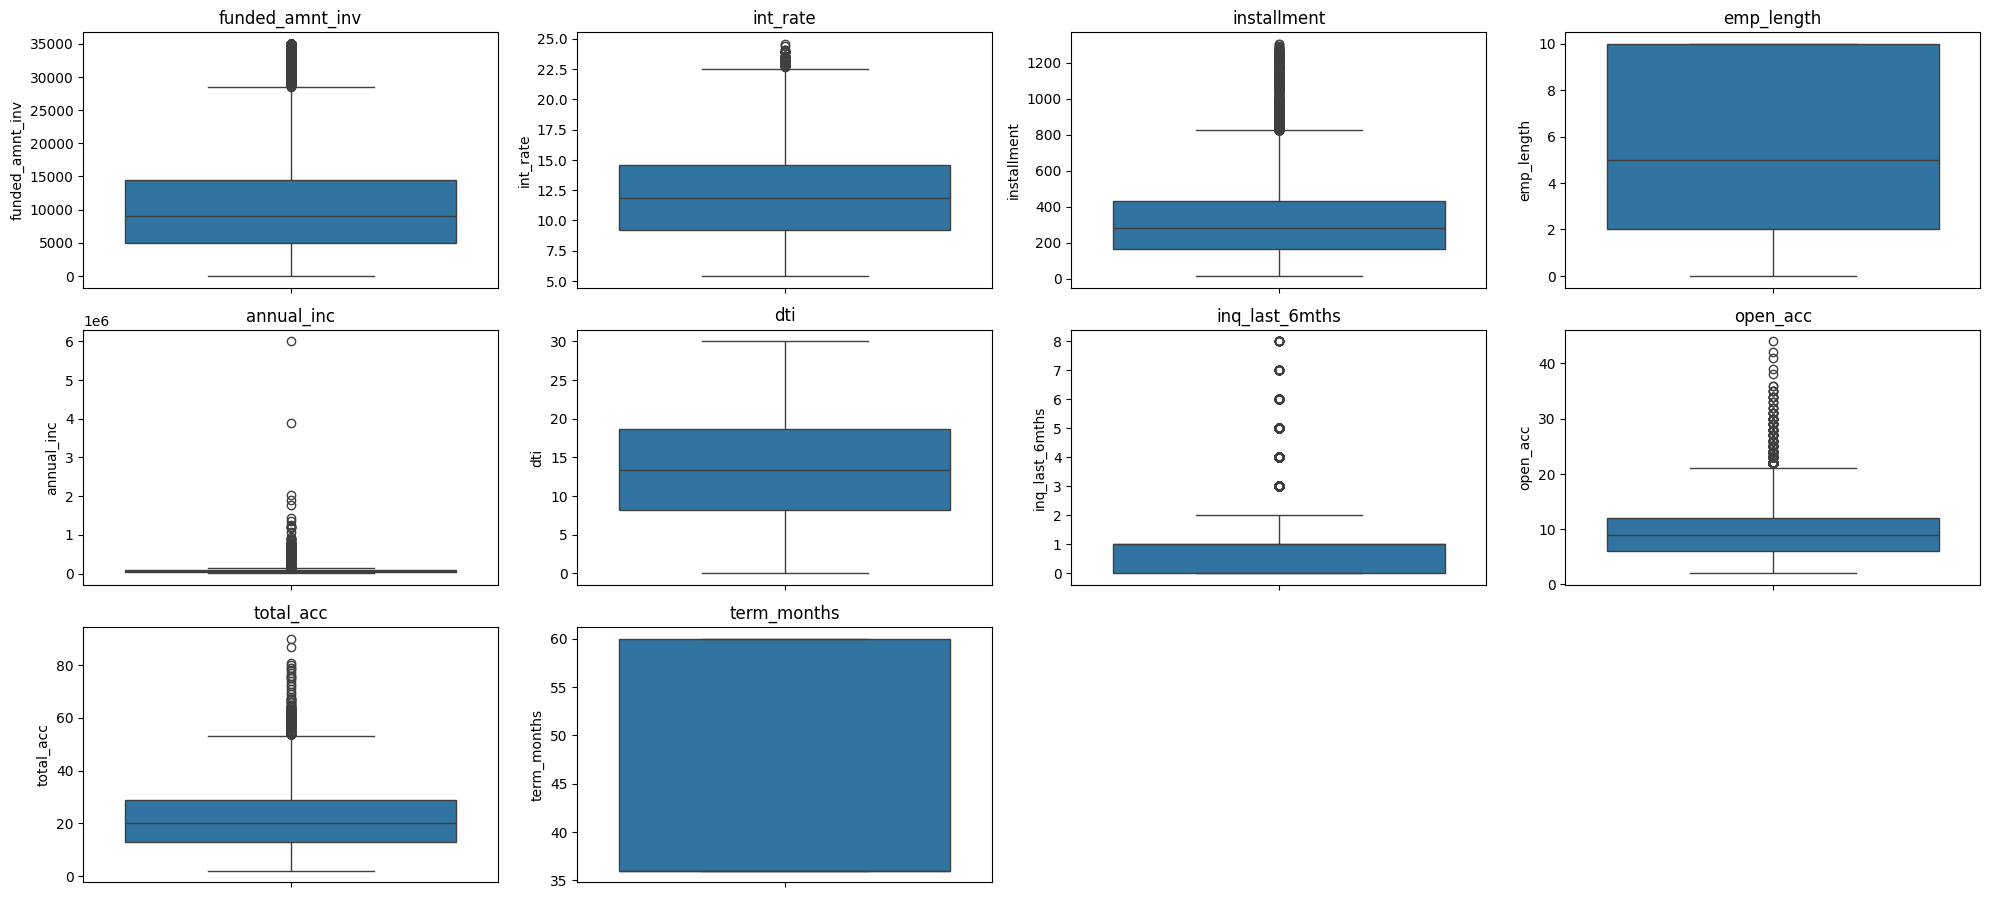

In [34]:

# Identify numerical columns
numerical_cols = loan_df.select_dtypes(include=['number']).columns

# Create box plots for each numerical column
plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=loan_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [35]:

# Identify numerical columns
numerical_cols = loan_df.select_dtypes(include=['number']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detect and treat outliers for each numerical column
for col in numerical_cols:
    outliers = detect_outliers_iqr(loan_df[col])
    print(f"Outliers in {col}:")
    print(outliers)



Outliers in funded_amnt_inv:
31       31825.0
128      35000.0
185      35000.0
209      28513.5
276      35000.0
          ...   
19800    31684.9
19811    31569.1
19825    29094.6
19838    30000.0
19857    34682.6
Name: funded_amnt_inv, Length: 1000, dtype: float64
Outliers in int_rate:
223      23.91
540      23.52
601      23.13
616      22.74
733      23.91
         ...  
13489    22.94
13492    24.40
14089    22.85
14600    23.59
15414    23.59
Name: int_rate, Length: 78, dtype: float64
Outliers in installment:
31        995
128      1111
131       843
170       835
185      1140
         ... 
39493     842
39496     836
39504     859
39529     828
39584     839
Name: installment, Length: 1254, dtype: int64
Outliers in emp_length:
Series([], Name: emp_length, dtype: int64)
Outliers in annual_inc:
74       150000.0
80       150000.0
170      225000.0
185      168000.0
298      150000.0
           ...   
39694    150000.0
39703    200000.0
39706    180000.0
39707    180000.0
39715 

### Observation

Some of the columns have outliers like annual_inc,inq_last_6mths have more outliers compared to other column
outlier treatment done for inq_last_6months

In [36]:

# Function to treat outliers using IQR
def treat_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), data[col].median(), data[col])
    return data

# Treat outliers in 'inq_last_6mths'
loan_df = treat_outliers_iqr(loan_df, 'inq_last_6mths')

In [37]:
loan_df['annual_inc_log'] = np.log(loan_df['annual_inc'] + 1)  # Add 1 to avoid log(0)

In [38]:
#Drop Annual Inc Log
#loan_df.drop(columns=['annual_inc'], axis = 1, inplace = True)

In [39]:
loan_df.columns


Index(['funded_amnt_inv', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_util',
       'total_acc', 'term_months', 'annual_inc_log'],
      dtype='object')

To start with identifying  Numerical Columns and Categorical Columns and start understanding them w.r.t loan status and record obeservations. This is a form of BiVariate Analysis

In [40]:
numerical_features = loan_df.select_dtypes(include=['number']).columns

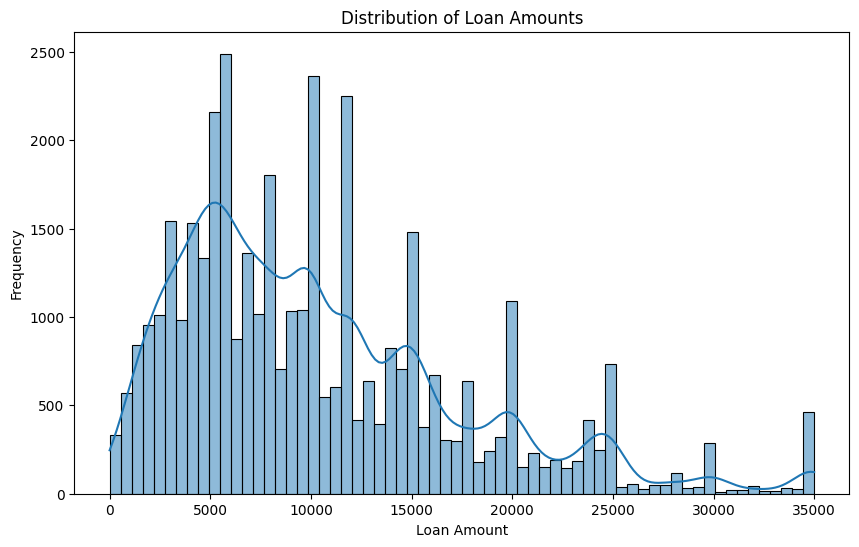

In [41]:


plt.figure(figsize=(10, 6))
sns.histplot(loan_df['funded_amnt_inv'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

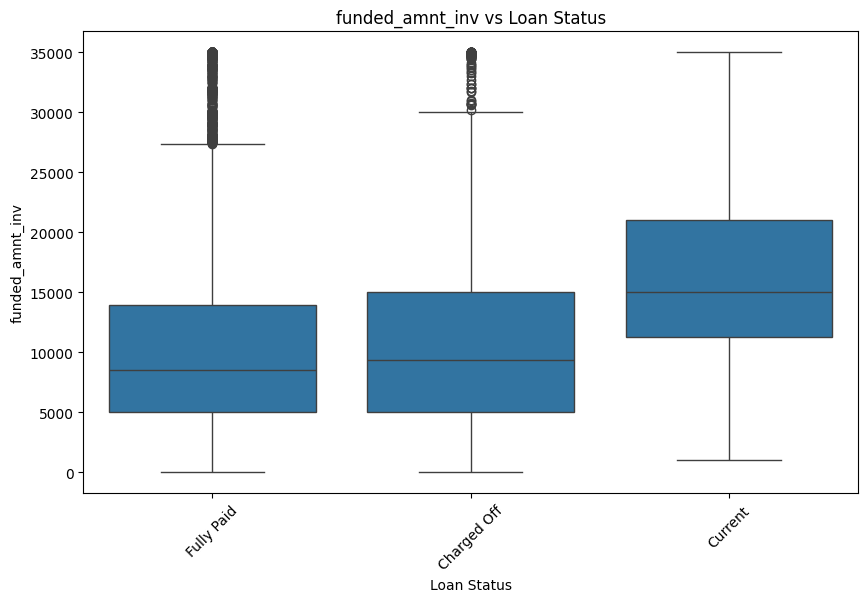

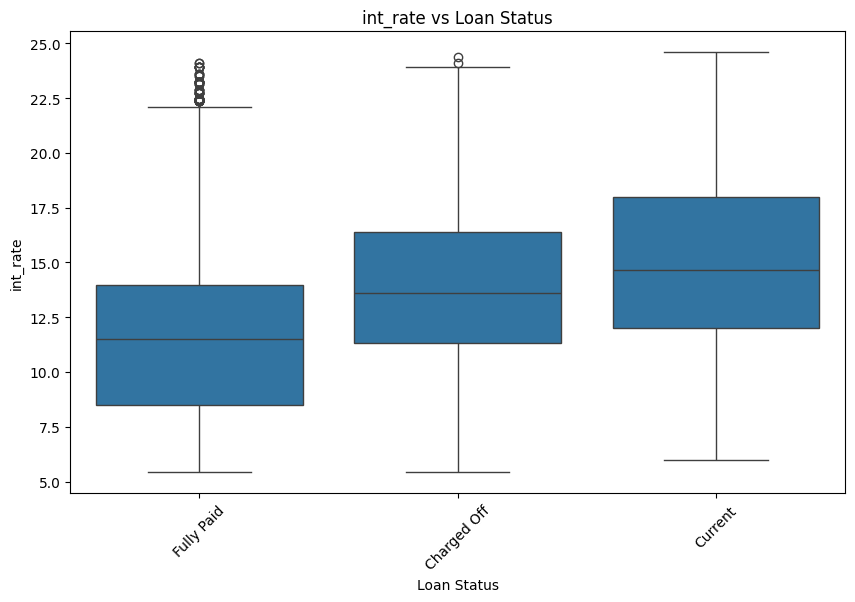

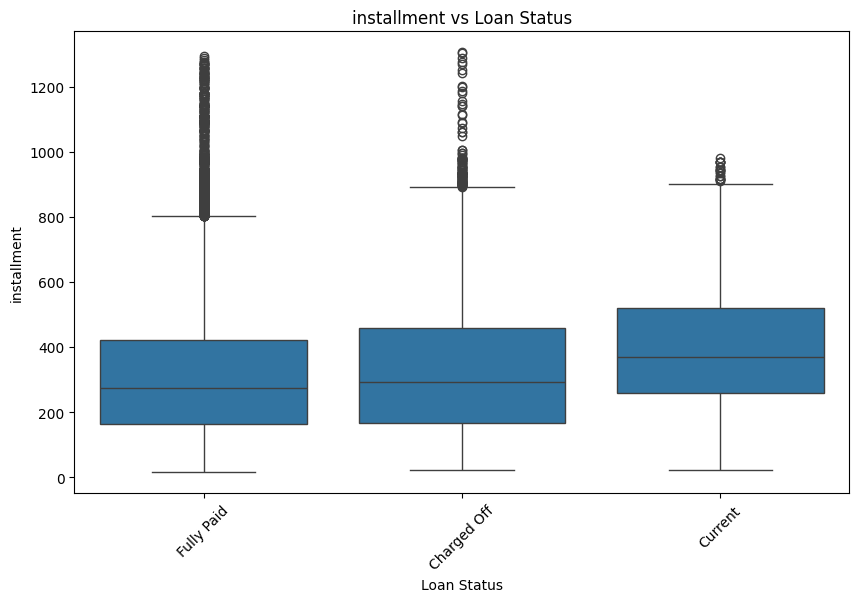

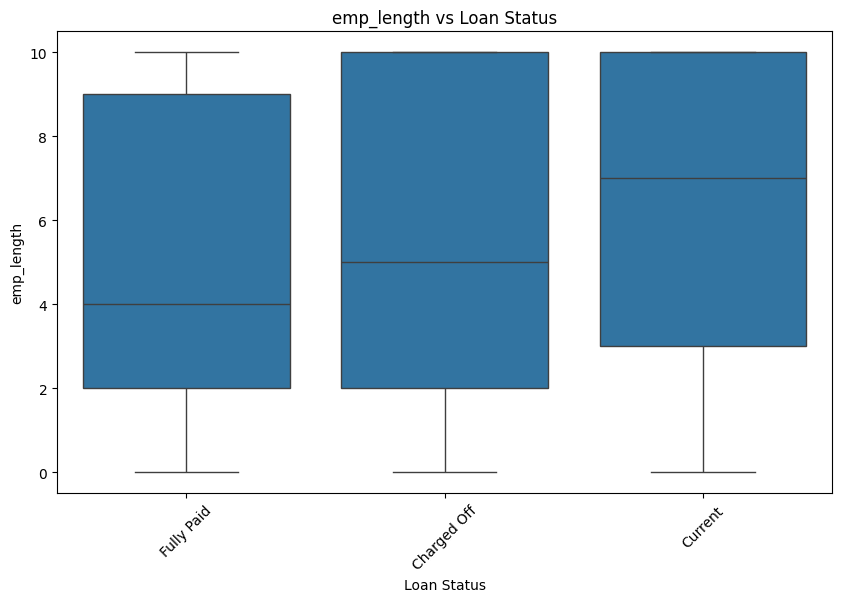

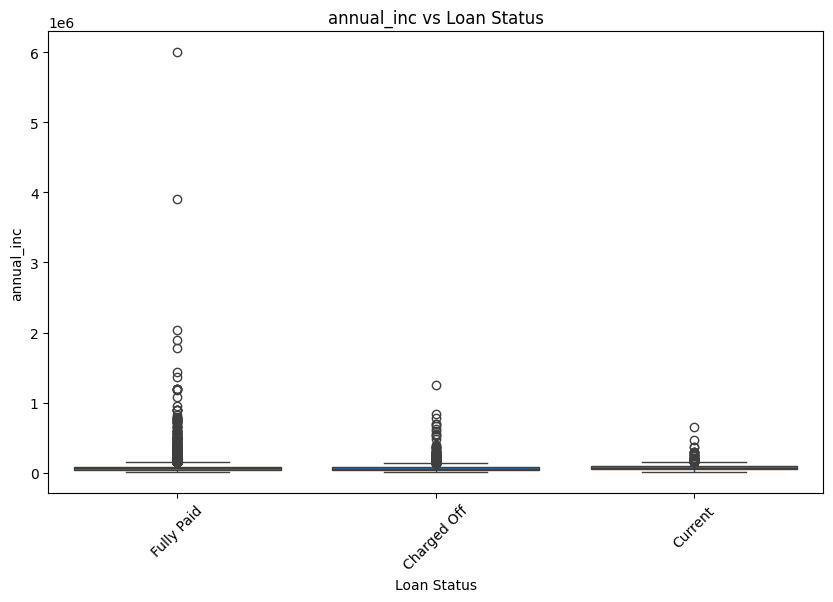

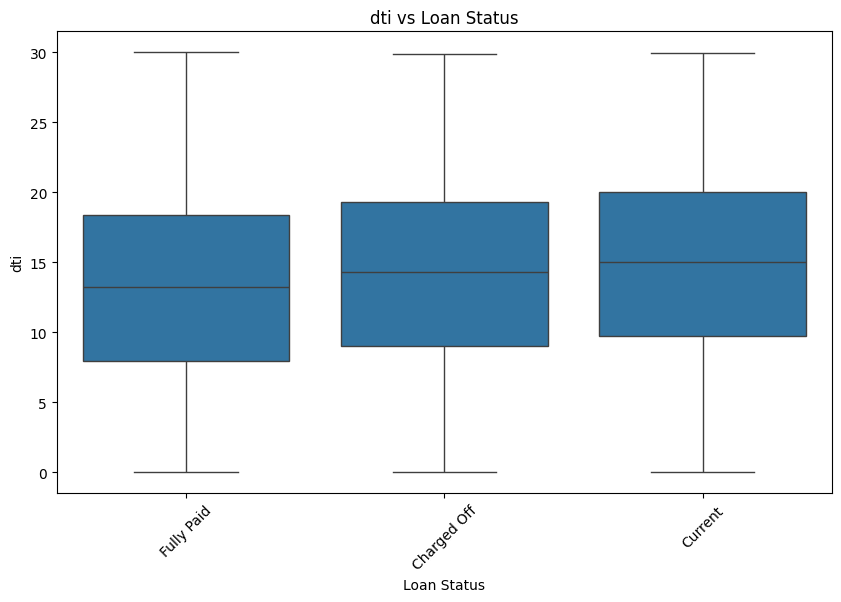

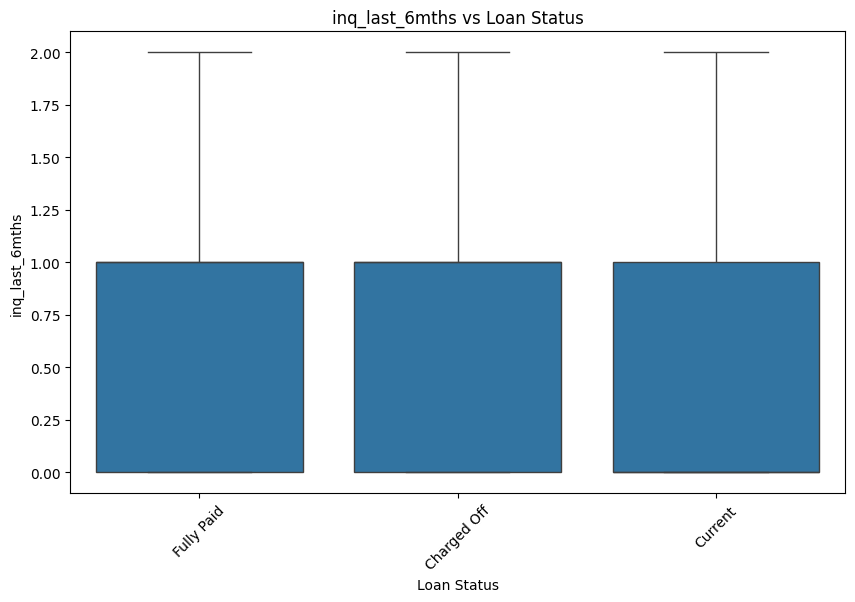

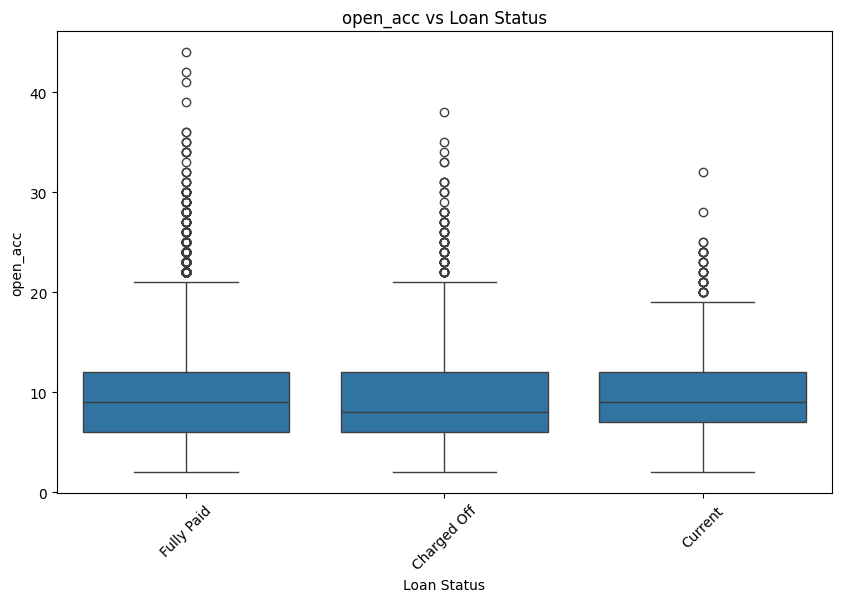

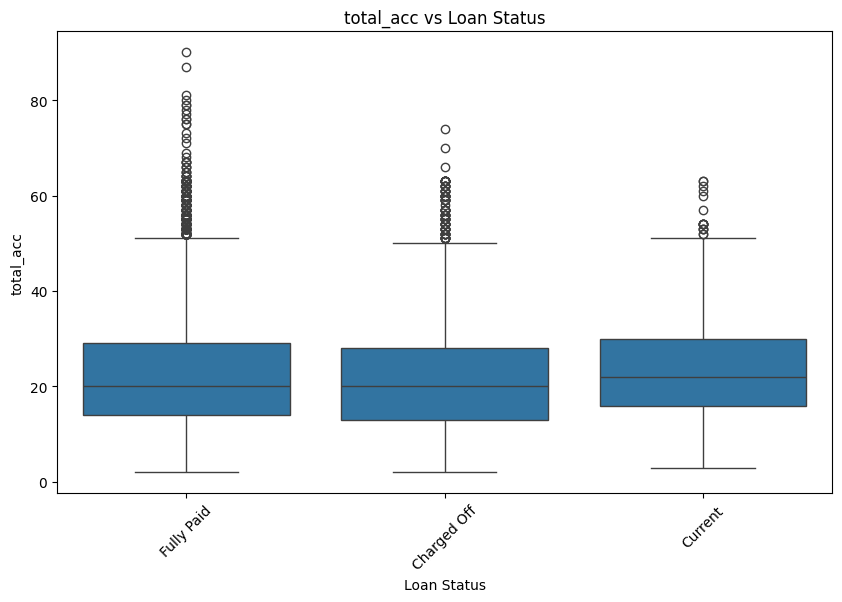

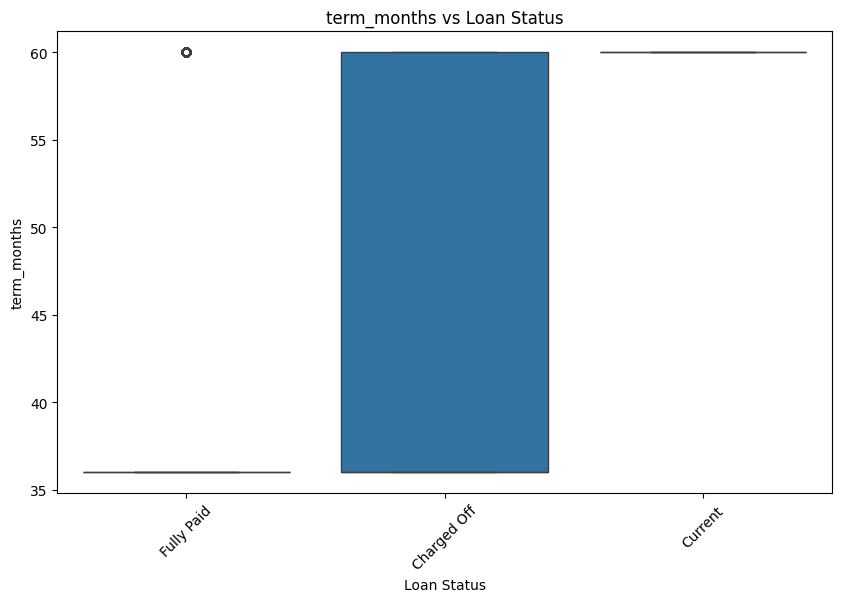

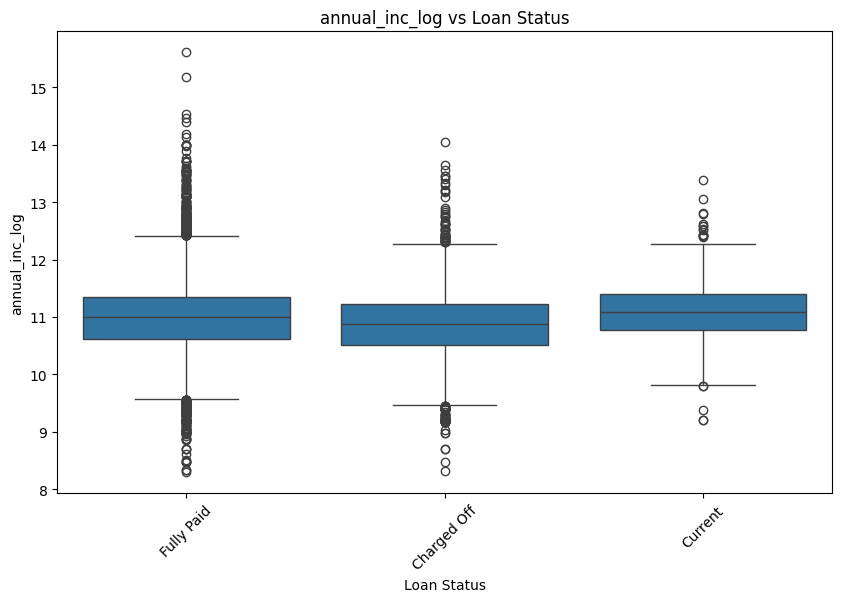

In [42]:
for feature in numerical_features:
       plt.figure(figsize=(10, 6))  # Adjust figure size as needed
       sns.boxplot(x='loan_status', y=feature, data=loan_df)
       plt.title(f'{feature} vs Loan Status')
       plt.xlabel('Loan Status')
       plt.ylabel(feature)
       plt.xticks(rotation=45)  # Rotate x-axis labels if needed
       plt.show()

###Numerical Analysis
1. Funded Amount Analysis indicated that if the funding is above higher then the probablity of default is higher , however the margin difference is not conclusive ,we may have to do hypothesis on this
2. Interest rate : If the interest is higher than 15% the likely hood of defaulting is higher. Hence lower rate of interest is one of ways to manage risk profiles. To analyse this further lets plot a. chart which loan status , interest rate and funding amount

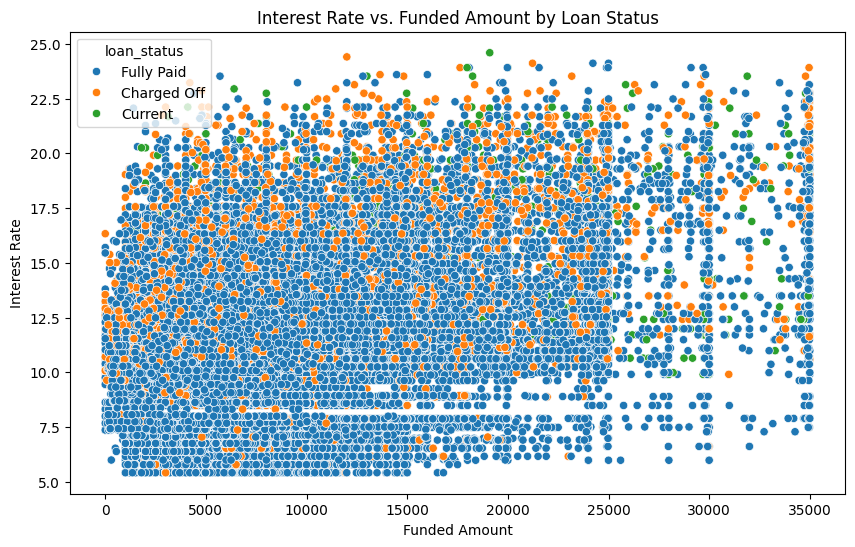

In [43]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='funded_amnt_inv', y='int_rate', hue='loan_status', data=loan_df)
plt.title('Interest Rate vs. Funded Amount by Loan Status')
plt.xlabel('Funded Amount')
plt.ylabel('Interest Rate')
plt.show()

In [44]:
loan_df.describe()

,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,total_acc,term_months,annual_inc_log
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,10397.448903,12.021177,324.065665,5.109500,6.896893e+04,13.315130,0.660397,9.294408,22.088828,42.418007,10.972990
std,7128.450434,3.724825,208.881880,3.607467,6.379377e+04,6.678594,0.718997,4.400282,11.401709,10.622815,0.558838
min,0.000000,5.420000,15.000000,0.000000,4.000000e+03,0.000000,0.000000,2.000000,2.000000,36.000000,8.294300
25%,5000.000000,9.250000,167.000000,2.000000,4.040400e+04,8.170000,0.000000,6.000000,13.000000,36.000000,10.606709
50%,8975.000000,11.860000,280.000000,5.000000,5.900000e+04,13.400000,1.000000,9.000000,20.000000,36.000000,10.985310
75%,14400.000000,14.590000,430.000000,10.000000,8.230000e+04,18.600000,1.000000,12.000000,29.000000,60.000000,11.318139
max,35000.000000,24.590000,1305.000000,10.000000,6.000000e+06,29.990000,2.000000,44.000000,90.000000,60.000000,15.607270


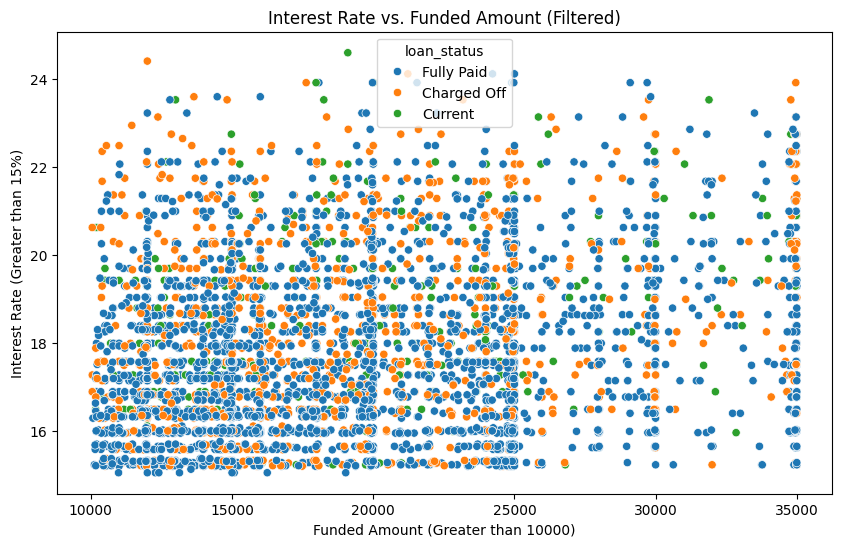

In [45]:
# Filter the DataFrame
filtered_df = loan_df[(loan_df['funded_amnt_inv'] > 10000) & (loan_df['int_rate'] > 15)]

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='funded_amnt_inv', y='int_rate', hue='loan_status', data=filtered_df)
plt.title('Interest Rate vs. Funded Amount (Filtered)')
plt.xlabel('Funded Amount (Greater than 10000)')
plt.ylabel('Interest Rate (Greater than 15%)')
plt.show()

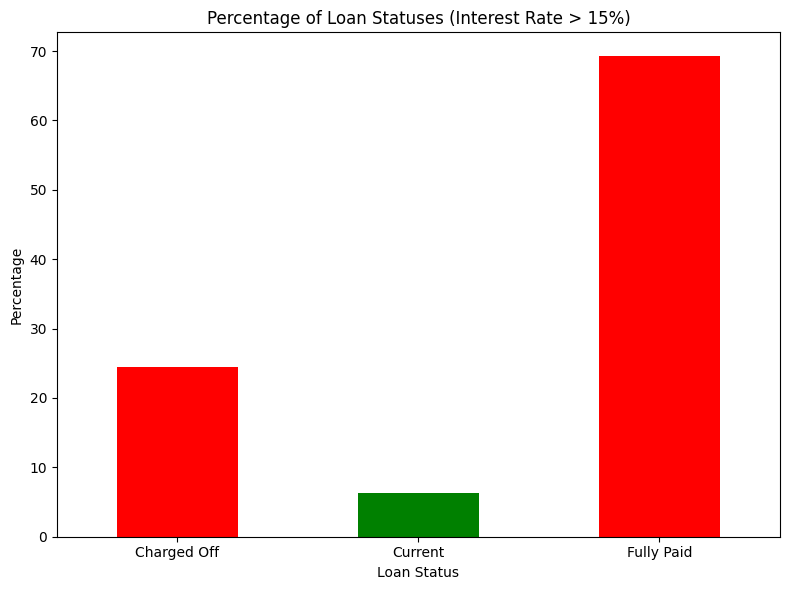

In [46]:
# Filter the DataFrame for interest rates greater than 15%
filtered_df = loan_df[loan_df['int_rate'] > 15]

# Group by loan status and count the occurrences
loan_status_counts = filtered_df.groupby('loan_status')['loan_status'].count()

# Calculate percentages
loan_status_percentages = loan_status_counts / loan_status_counts.sum() * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
loan_status_percentages.plot(kind='bar', color=['red', 'green'])  # Customize colors as needed
plt.title('Percentage of Loan Statuses (Interest Rate > 15%)')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

Segmented Univariate analysis with BINS for Numerical Values & focus on charged off loans

Create binning to analyze this more efficiently

In [47]:
loan_df.columns

Index(['funded_amnt_inv', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_util',
       'total_acc', 'term_months', 'annual_inc_log'],
      dtype='object')

In [48]:
loan_df['revol_util'] = pd.to_numeric(loan_df['revol_util'].str.rstrip('%'), errors='coerce')

In [49]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-10%','11%-15%','16%-20%','21%-25%','26%-30%'])
loan_df['open_acc_groups'] = pd.cut(loan_df['open_acc'],bins = 5,precision =0,labels=['1-10','11-20','21-30','31-40','41-50'])
loan_df['revol_util_groups'] = pd.cut(loan_df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_df['total_acc_groups'] = pd.cut(loan_df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_df['funded_amnt_inv_groups'] = pd.cut(loan_df['funded_amnt_inv'], bins=5,precision =0,labels =['1k-31k','32k-58k','59k-85k','86k-112k','113k-140k'])
#

In [50]:
loan_df.head()

,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,revol_util,total_acc,term_months,annual_inc_log,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,funded_amnt_inv_groups
0,4975.0,10.65,162,B,B2,10,RENT,24000.0,Verified,Dec-11,...,3,83.7,9,36,10.085851,11%-15%,1-10,80-100,2-20,1k-31k
1,2500.0,15.27,59,C,C4,0,RENT,30000.0,Source Verified,Dec-11,...,3,9.4,4,60,10.308986,16%-20%,1-10,0-20,2-20,1k-31k
2,2400.0,15.96,84,C,C5,10,RENT,12252.0,Not Verified,Dec-11,...,2,98.5,10,36,9.413526,16%-20%,1-10,80-100,2-20,1k-31k
3,10000.0,13.49,339,C,C1,10,RENT,49200.0,Source Verified,Dec-11,...,10,21.0,37,36,10.803669,16%-20%,1-10,20-40,20-37,32k-58k
4,3000.0,12.69,67,B,B5,1,RENT,80000.0,Source Verified,Dec-11,...,15,53.9,38,60,11.289794,11%-15%,11-20,40-60,37-55,1k-31k


In [51]:
# Filter for charged-off loans
charged_off_loans = loan_df[loan_df['loan_status'] == 'Charged Off']

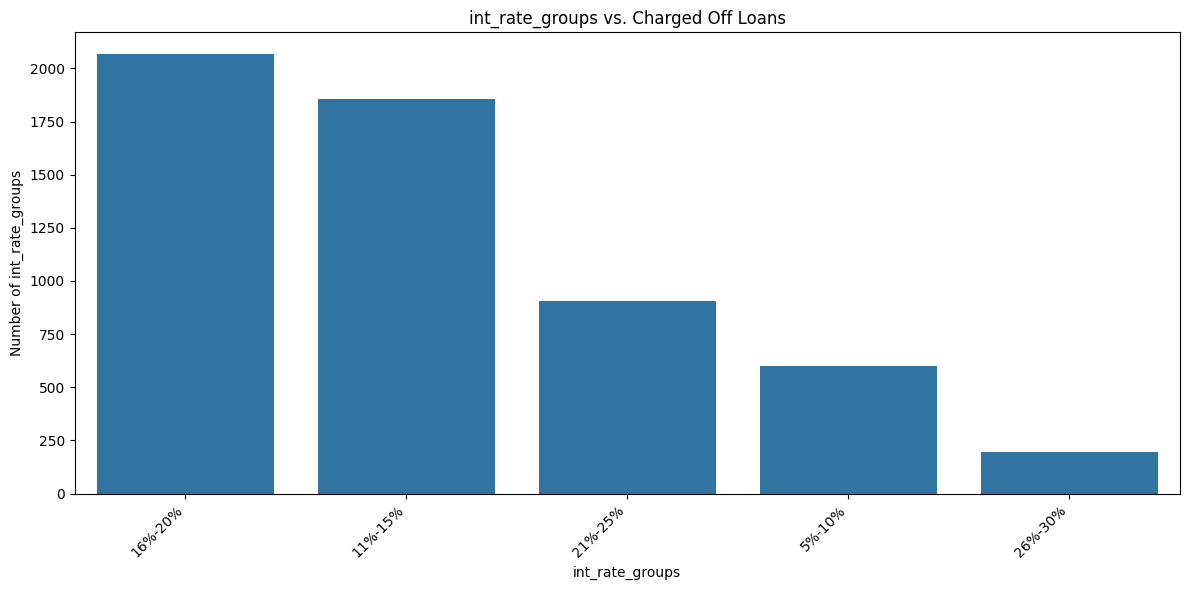

In [52]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(x='int_rate_groups', data=charged_off_loans, order=charged_off_loans['int_rate_groups'].value_counts().index)
plt.title('int_rate_groups vs. Charged Off Loans')
plt.xlabel('int_rate_groups')
plt.ylabel('Number of int_rate_groups')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

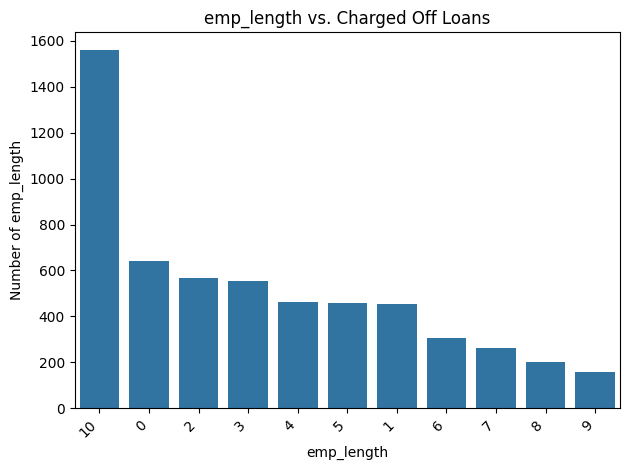

In [53]:
sns.countplot(x='emp_length', data=charged_off_loans, order=charged_off_loans['emp_length'].value_counts().index)
plt.title('emp_length vs. Charged Off Loans')
plt.xlabel('emp_length')
plt.ylabel('Number of emp_length')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<Axes: xlabel='funded_amnt_inv_groups', ylabel='count'>

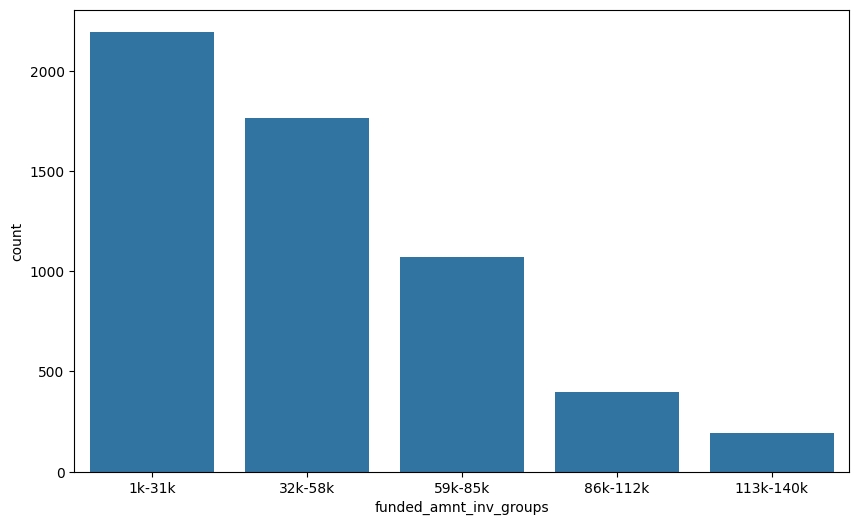

In [54]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='funded_amnt_inv_groups', data=charged_off_loans)

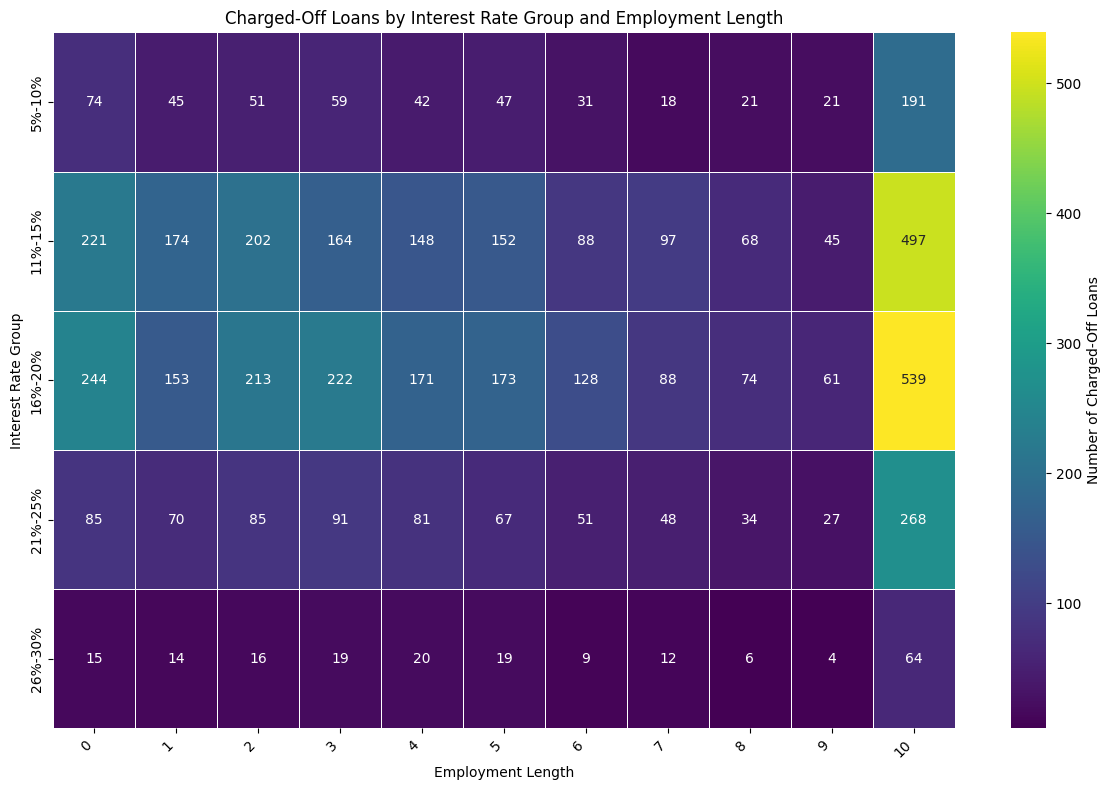

In [55]:
# Group the data and calculate the count of charged-off loans for each group
grouped_data = charged_off_loans.groupby(['int_rate_groups', 'emp_length'])['loan_status'].count().reset_index()

# Rename the 'loan_status' column to 'count' for better clarity
grouped_data = grouped_data.rename(columns={'loan_status': 'count'})

# Create the heatmap using seaborn
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(
    grouped_data.pivot(index='int_rate_groups', columns='emp_length', values='count'),
    annot=True,  # Show values in the heatmap cells
    cmap='viridis',  # Choose a colormap
    fmt='d',  # Format for displaying values as integers
    linewidths=0.5,  # Add lines between cells
    cbar_kws={'label': 'Number of Charged-Off Loans'}  # Label for the colorbar
)
plt.title('Charged-Off Loans by Interest Rate Group and Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Interest Rate Group')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

####Observations

1. Int Rate Groups 16%-20% are at high risk of default , validate payment capacity before giving loans at high ROI
2. Employement term more than 10years and have high rate of interest i.e 16%-20% have high chance of risk
3. Loans taken under 31k have high risk of loan defaulting

###Categorcial analysis

In [56]:
categorical_features = loan_df.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('loan_status') # Exclude the target variable

In [57]:
categorical_features

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line'],
      dtype='object')

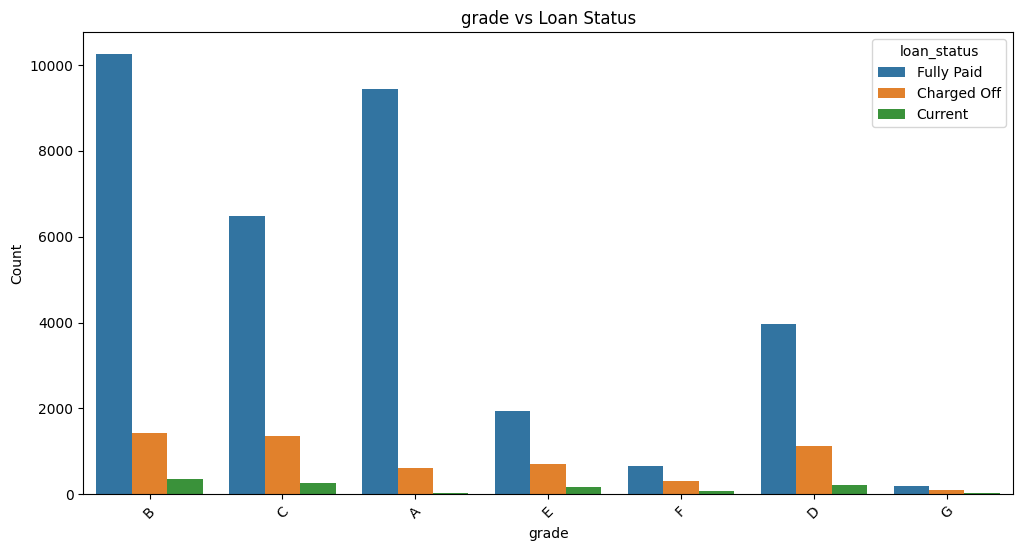

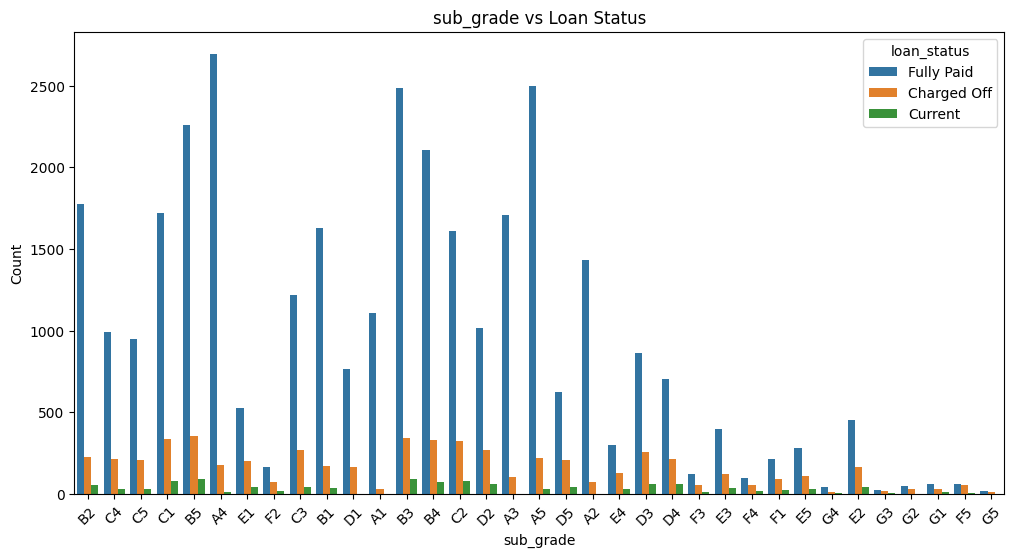

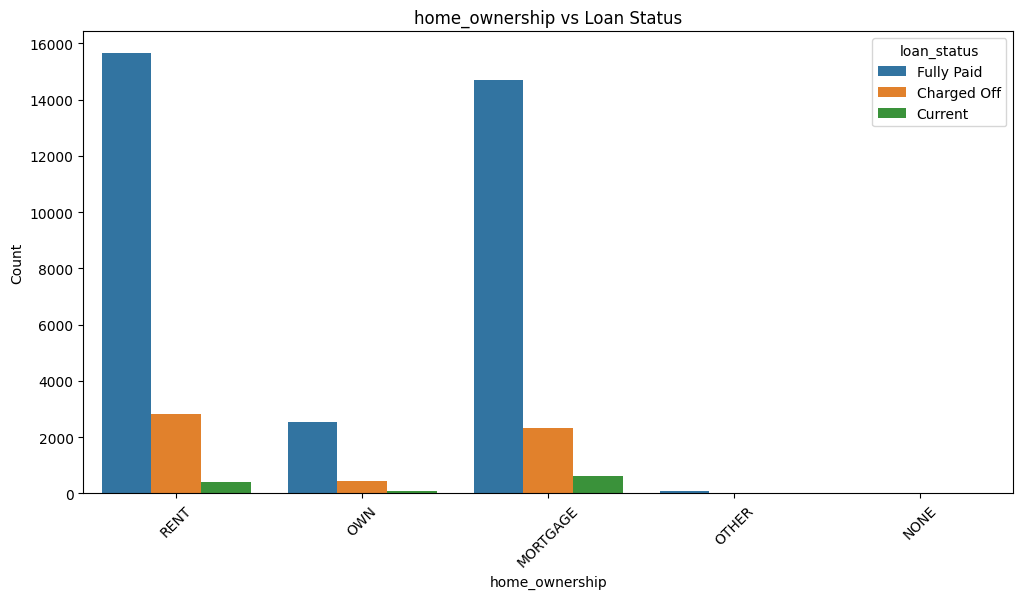

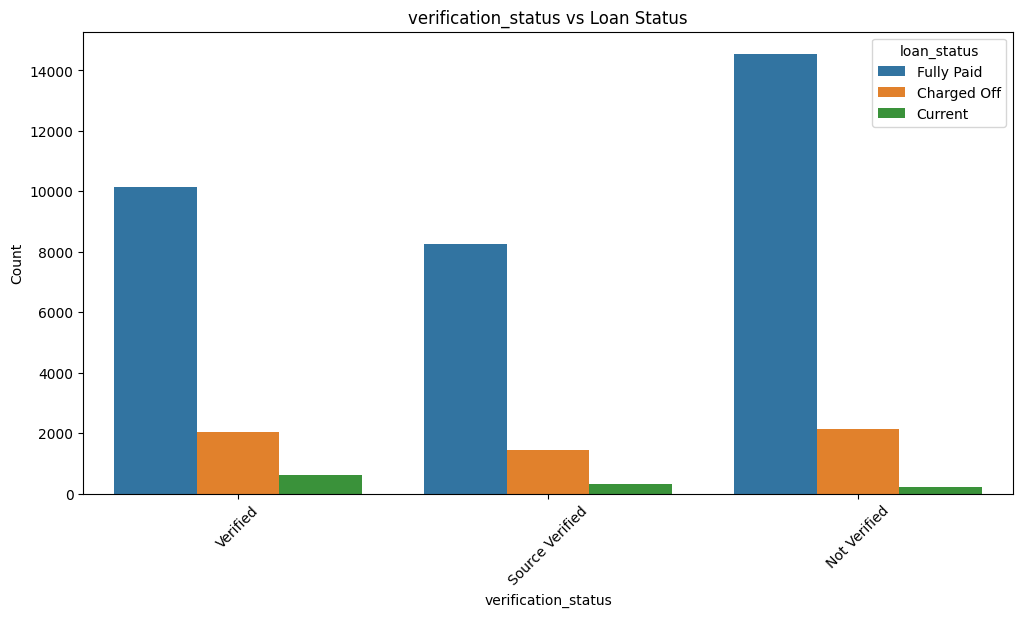

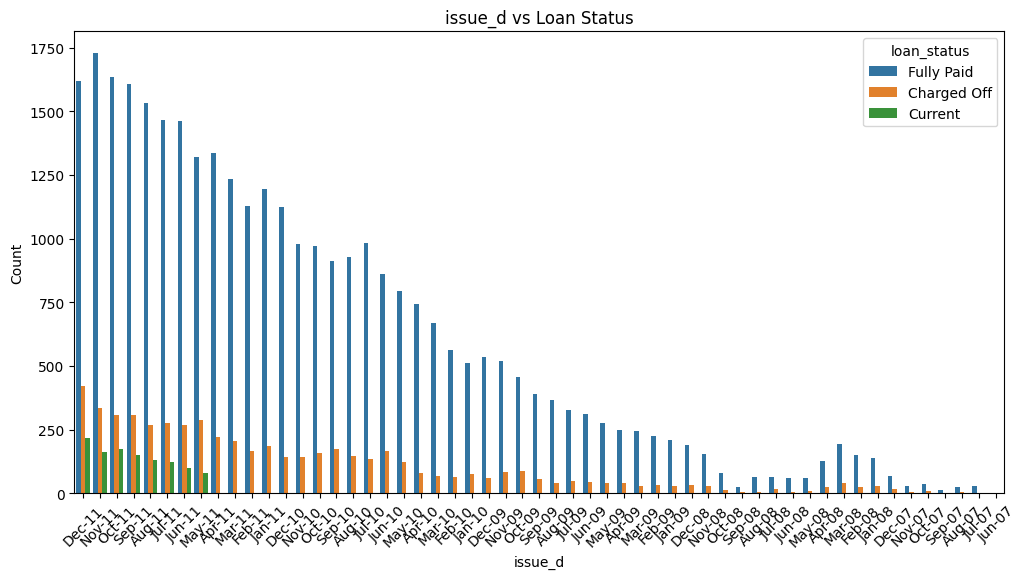

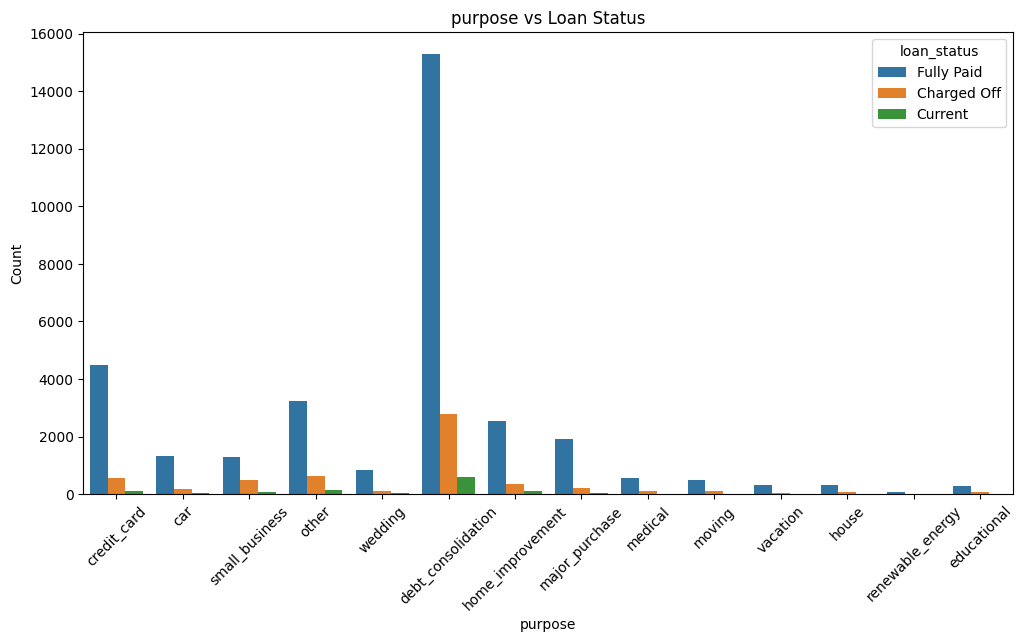

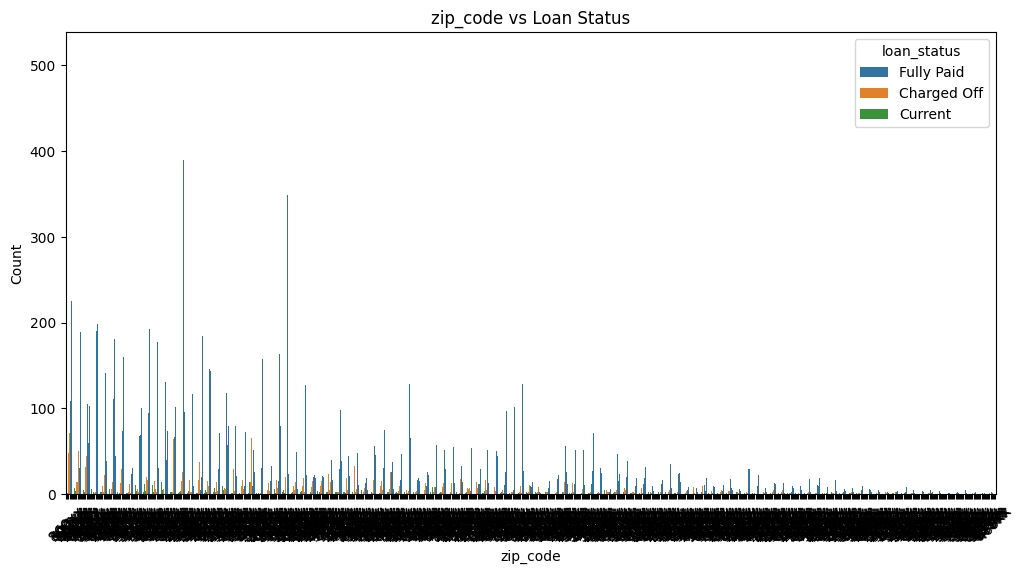

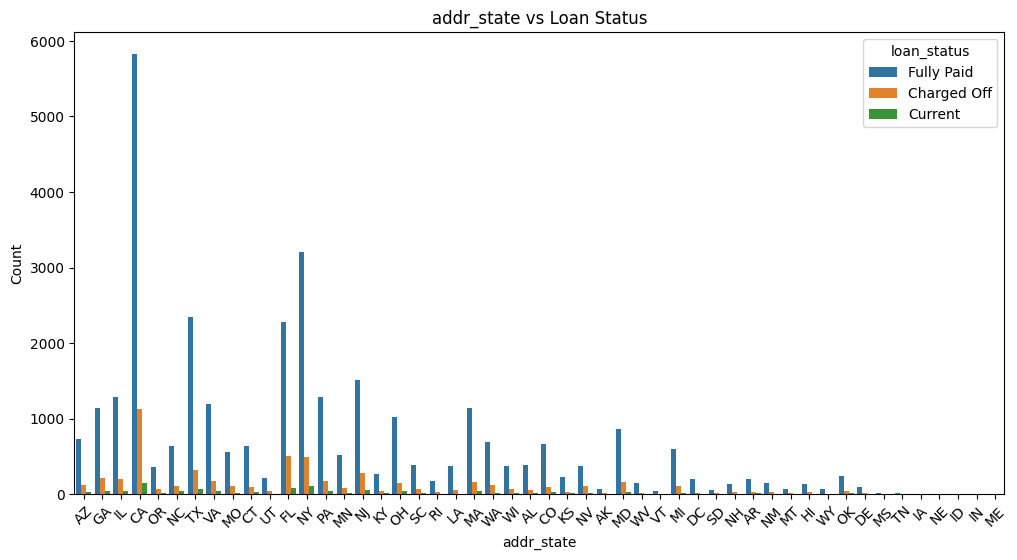

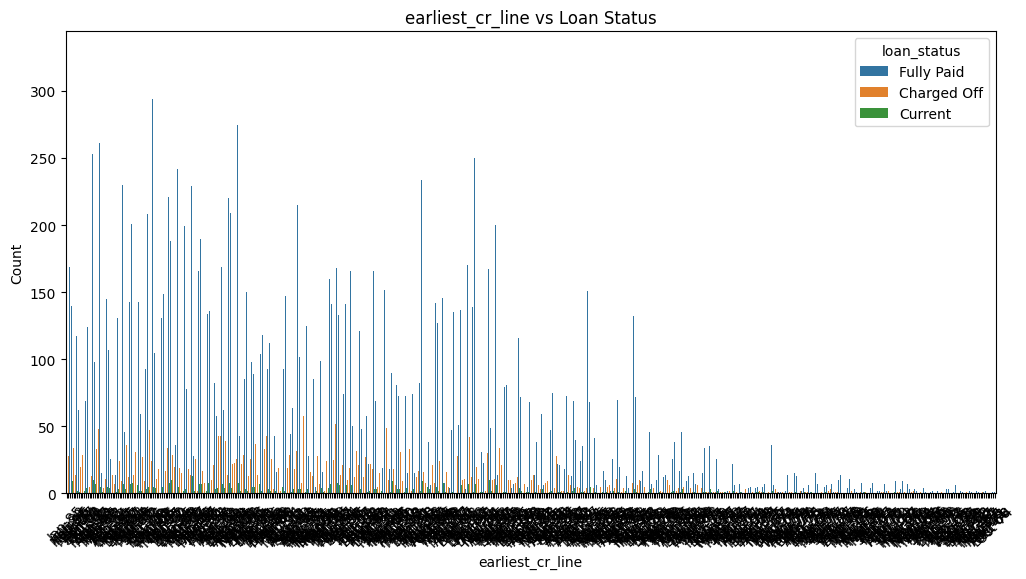

In [58]:
for feature in categorical_features:
       plt.figure(figsize=(12, 6))  # Adjust figure size as needed
       sns.countplot(x=feature, hue='loan_status', data=loan_df)
       plt.title(f'{feature} vs Loan Status')
       plt.xlabel(feature)
       plt.ylabel('Count')
       plt.xticks(rotation=45)  # Rotate x-axis labels if needed
       plt.show()

Lets focus on Loan Status=Charged Off and do our analysis for categorical variables

<Axes: xlabel='loan_status', ylabel='count'>

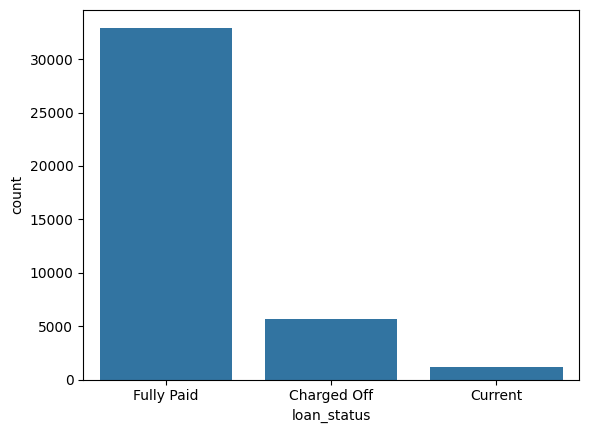

In [59]:
sns.countplot(x = 'loan_status', data = loan_df)

In [60]:
# Filter for charged-off loans
charged_off_loans = loan_df[loan_df['loan_status'] == 'Charged Off']


<Axes: xlabel='grade', ylabel='count'>

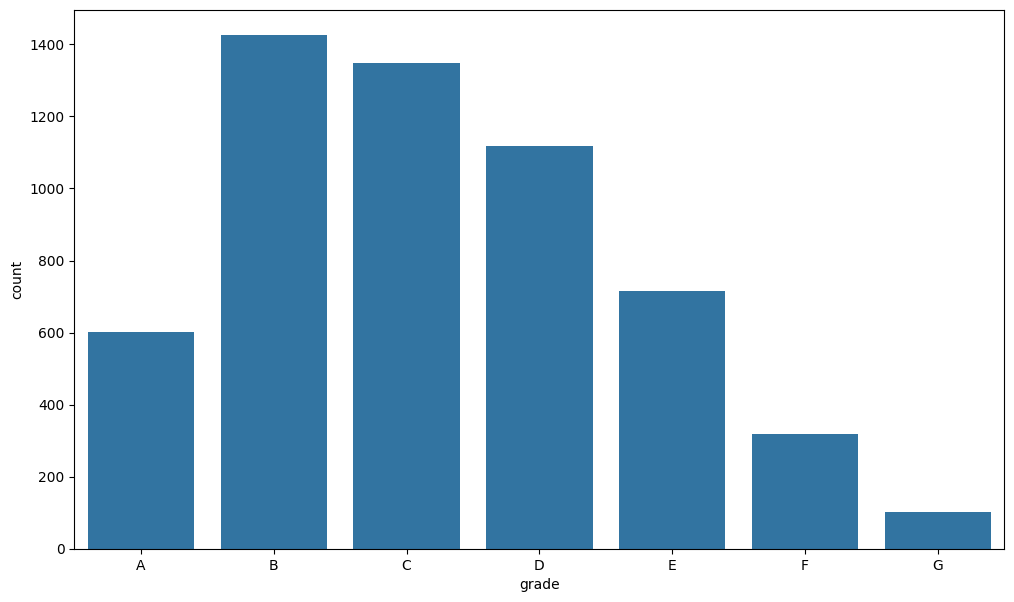

In [61]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,data = charged_off_loans)

In [62]:
charged_off_loans.sub_grade = pd.to_numeric(charged_off_loans.sub_grade.apply(lambda x : x[-1]))
charged_off_loans.sub_grade.head()

,sub_grade
1,4
8,2
9,5
12,1
14,2


<Axes: xlabel='grade', ylabel='count'>

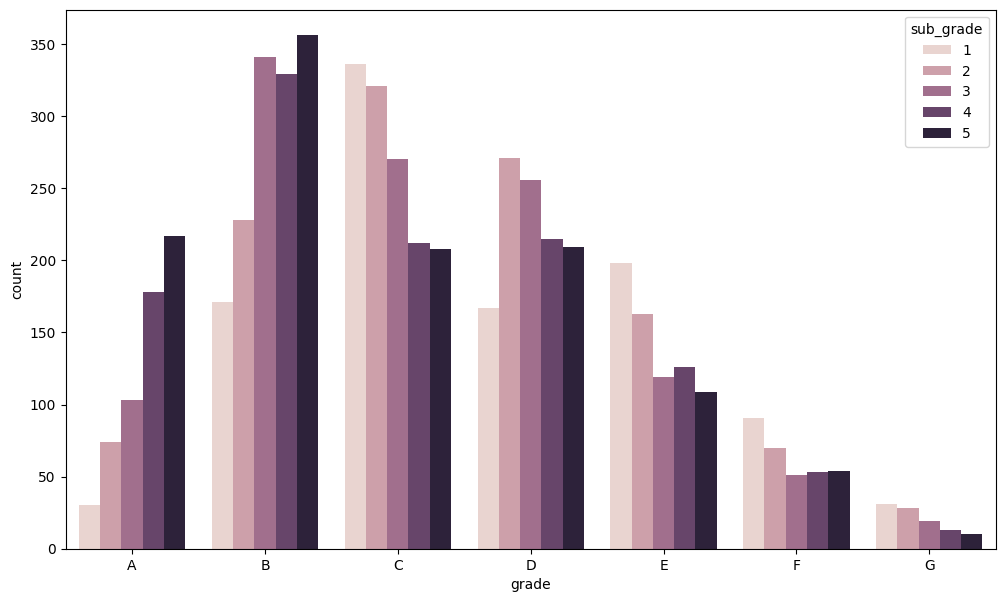

In [63]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,hue='sub_grade',data = charged_off_loans)

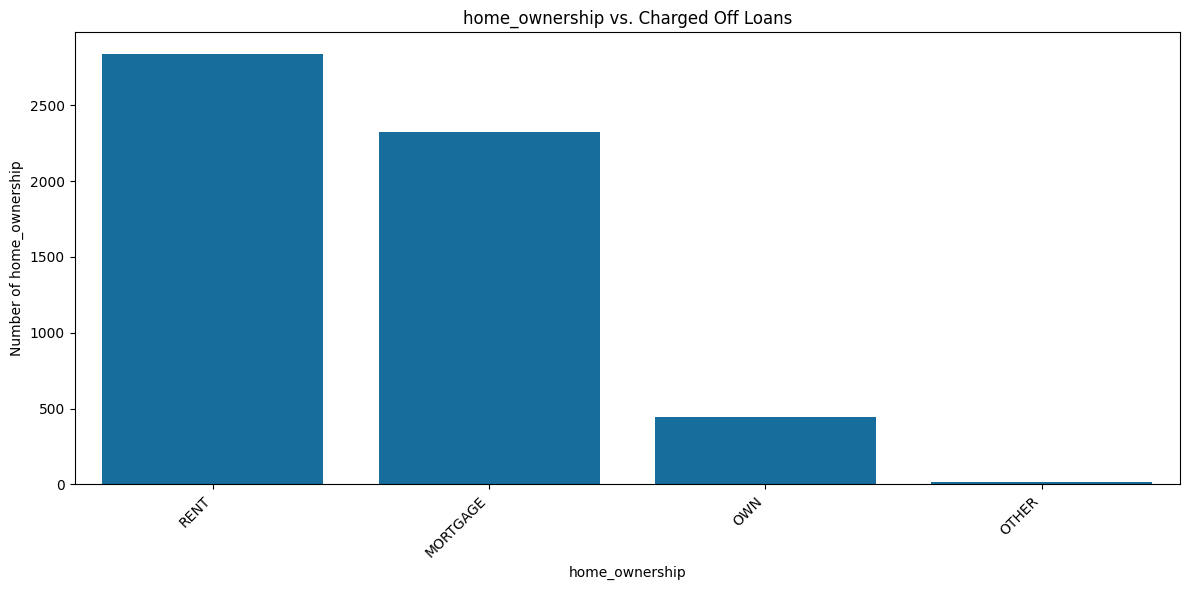

In [64]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(x='home_ownership', data=charged_off_loans, order=charged_off_loans['home_ownership'].value_counts().index)
plt.title('home_ownership vs. Charged Off Loans')
plt.xlabel('home_ownership')
plt.ylabel('Number of home_ownership')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

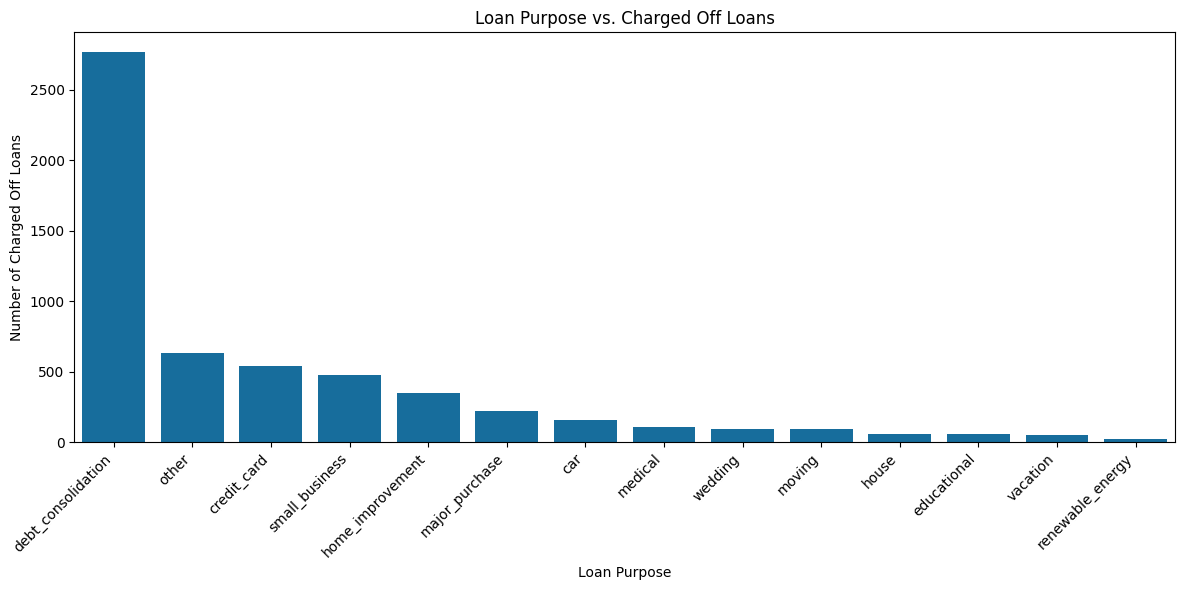

In [65]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(x='purpose', data=charged_off_loans, order=charged_off_loans['purpose'].value_counts().index)
plt.title('Loan Purpose vs. Charged Off Loans')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Charged Off Loans')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

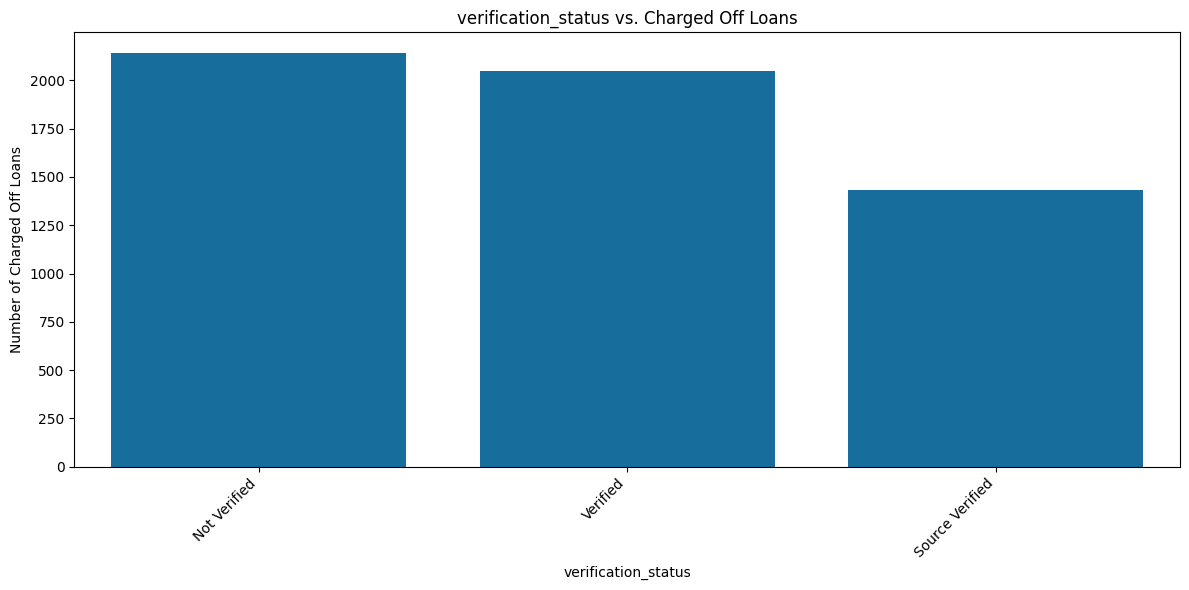

In [66]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(x='verification_status', data=charged_off_loans, order=charged_off_loans['verification_status'].value_counts().index)
plt.title('verification_status vs. Charged Off Loans')
plt.xlabel('verification_status')
plt.ylabel('Number of Charged Off Loans')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

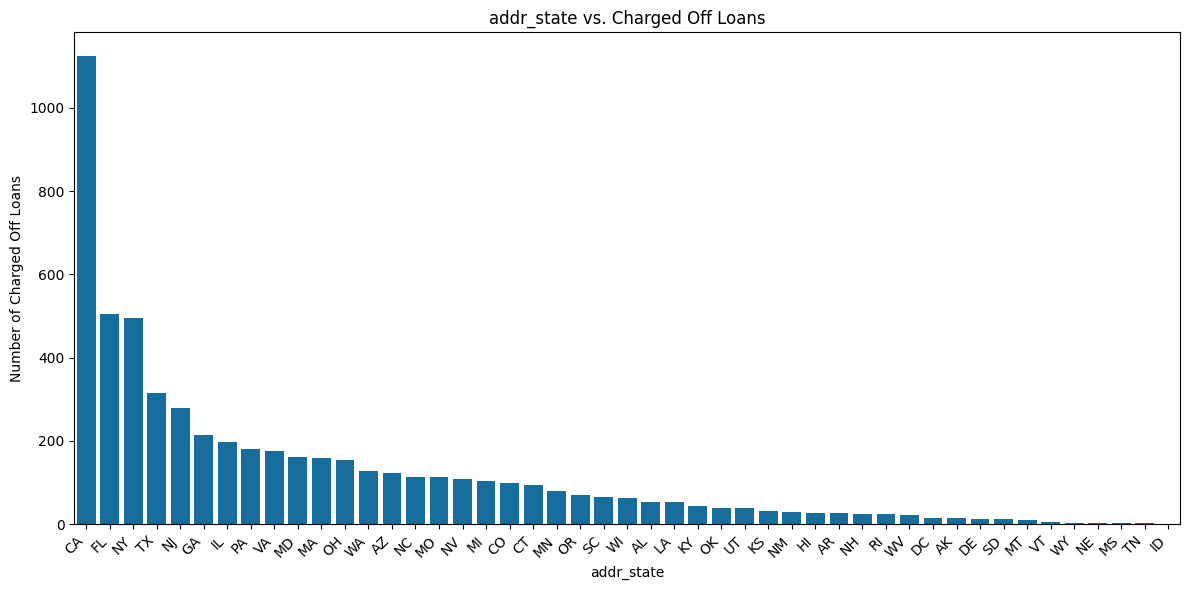

In [67]:

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(x='addr_state', data=charged_off_loans, order=charged_off_loans['addr_state'].value_counts().index)
plt.title('addr_state vs. Charged Off Loans')
plt.xlabel('addr_state')
plt.ylabel('Number of Charged Off Loans')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

####Observations
1. LC Grade B and D have highest risk, within B and C , Sub Grades - B3 and C2 have the highest number of defaults
2. Loan applicants who stay in Rented houses have high probablity of default
3. Loan taken for purpose of debt consilidation have very high probability of defaulting
4. While loan verification is important the impact is very limited on risk
5. CA State applicants have the highest amt of loan default risk


###Further BiVariate Analysis

##Deriving new columns for analysis
Analyzing by issued month and year

In [68]:
## Extracting month and year
df_month_year = loan_df['issue_d'].str.partition("-", True)
loan_df['issue_month']=df_month_year[0]
loan_df['issue_year']='20' + df_month_year[2]

In [69]:
# Update  charged-off loans df with new columns
charged_off_loans = loan_df[loan_df['loan_status'] == 'Charged Off']

<Axes: xlabel='issue_year', ylabel='count'>

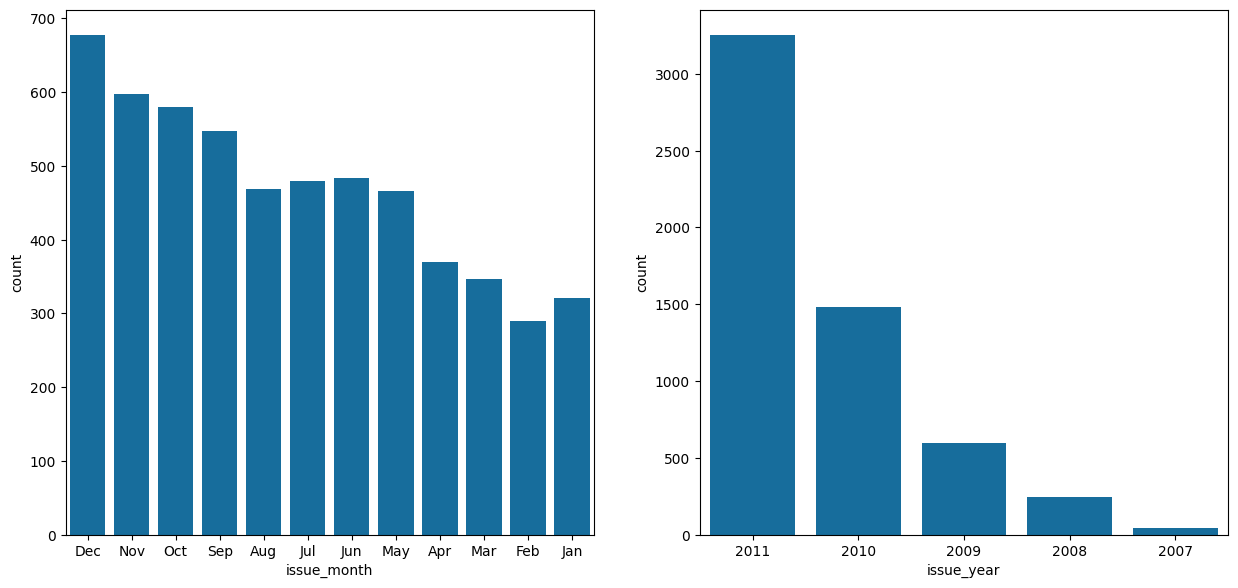

In [70]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=charged_off_loans)
plt.subplot(222)
sns.countplot(x='issue_year', data=charged_off_loans)


In [71]:
loan_df['installment_groups'] = pd.cut(loan_df['installment'], bins=10,precision =0,labels=['0-100','101-200','201-400','401-550','551-700','701-800','801-900','901-1000','1001-1200','1201-1300'])
loan_df['funded_amnt_inv_group'] = pd.cut(loan_df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df['dti_groups'] = pd.cut(loan_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [72]:
# Update  charged-off loans df with new columns
charged_off_loans = loan_df[loan_df['loan_status'] == 'Charged Off']

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

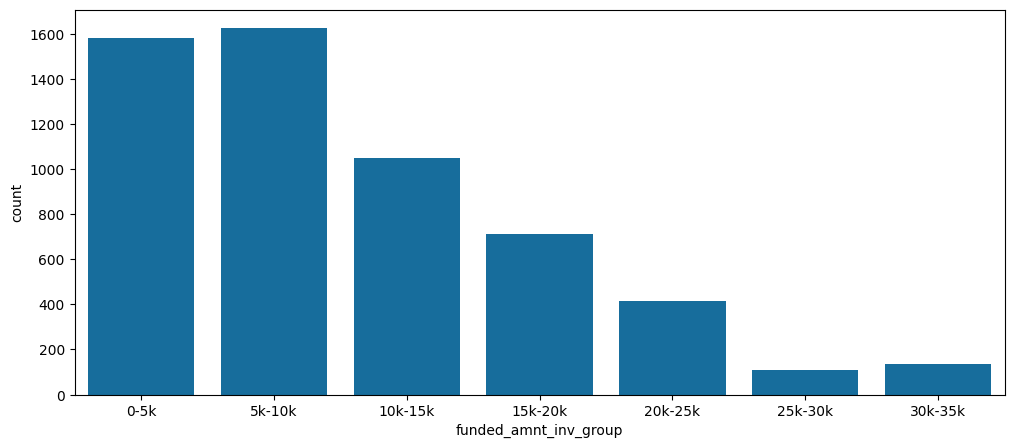

In [73]:
fig,ax = plt.subplots(figsize = (12,5))
#sns.countplot(x='installment_groups', data=charged_off_loans)
sns.countplot(x='funded_amnt_inv_group', data=charged_off_loans)

<Axes: xlabel='installment_groups', ylabel='count'>

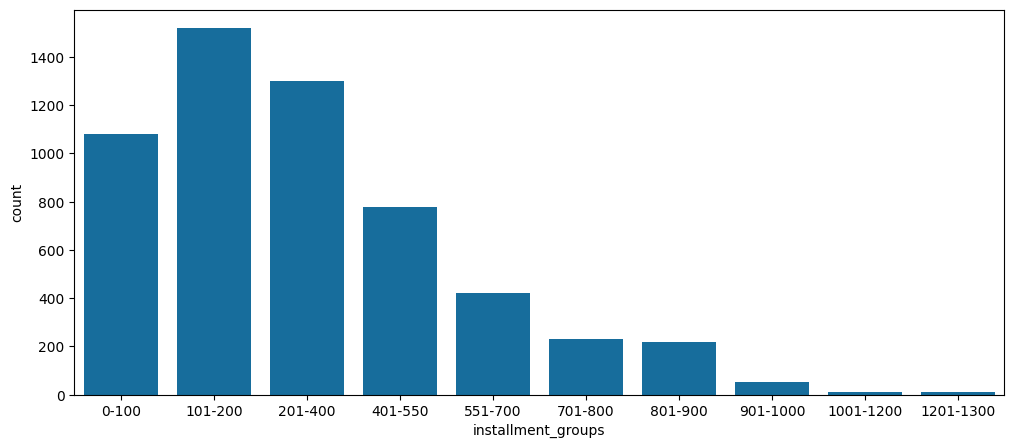

In [74]:
fig,ax = plt.subplots(figsize = (12,5))
sns.countplot(x='installment_groups', data=charged_off_loans)

<Axes: xlabel='dti_groups', ylabel='count'>

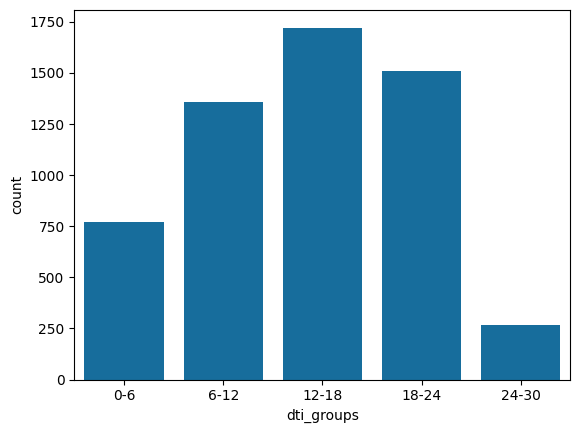

In [75]:
sns.countplot(x='dti_groups', data=charged_off_loans)

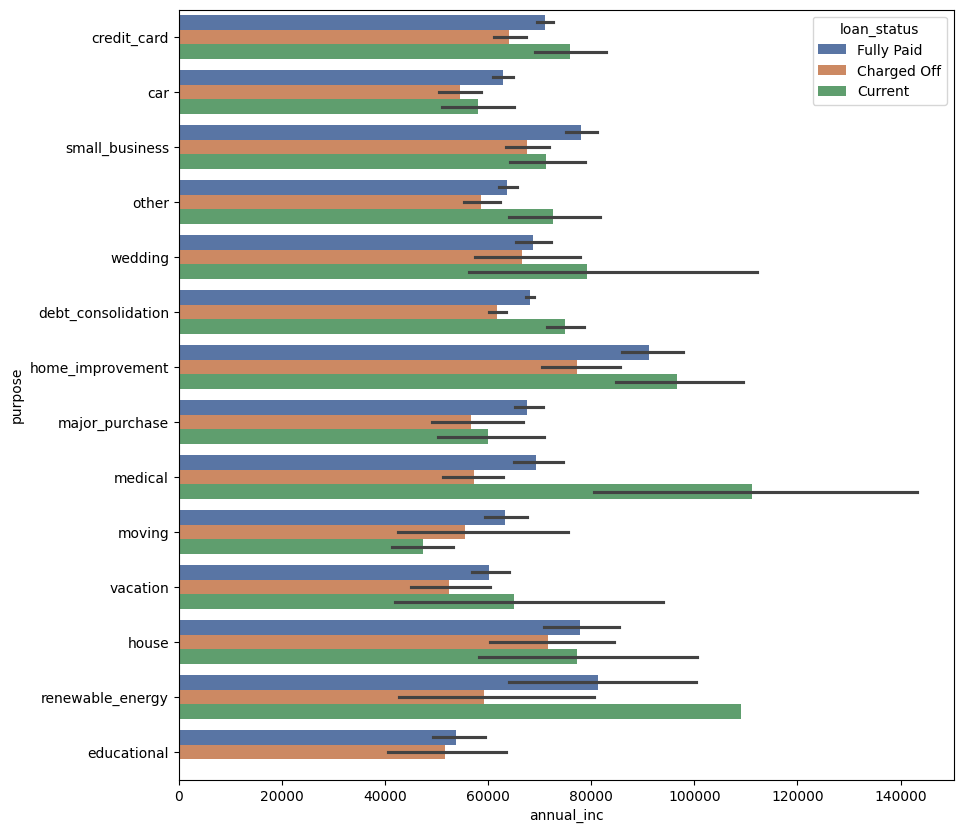

In [76]:
#Annual income vs loan purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

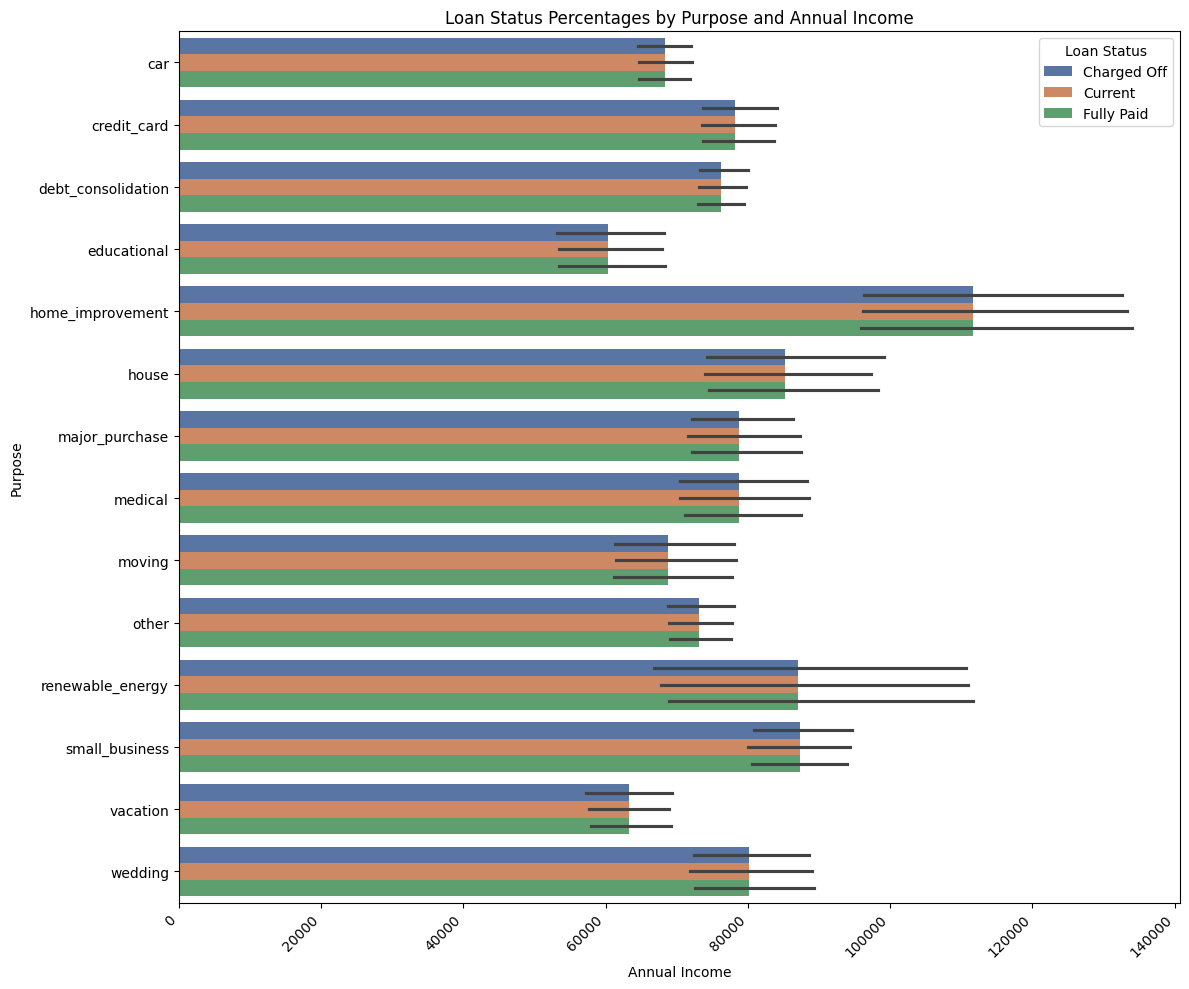

In [77]:
# Group the data and calculate the loan status percentages
loan_df_percent = loan_df.groupby(['purpose', 'annual_inc', 'loan_status'])['loan_status'].count().unstack().fillna(0)
loan_df_percent = loan_df_percent.div(loan_df_percent.sum(axis=1), axis=0) * 100

# Reshape the data for seaborn
loan_df_percent = loan_df_percent.stack().reset_index(name='percentage')

# Create the bar plot using seaborn
plt.figure(figsize=(12, 10))
sns.barplot(
    data=loan_df_percent,
    x='annual_inc',
    y='purpose',
    hue='loan_status',
    palette="deep",
    estimator=np.mean  # To avoid summing percentages
)
plt.title('Loan Status Percentages by Purpose and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Purpose')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [78]:
loan_df_percent

,purpose,annual_inc,loan_status,percentage
0,car,4800.0,Charged Off,0.0
1,car,4800.0,Current,0.0
2,car,4800.0,Fully Paid,100.0
3,car,7000.0,Charged Off,0.0
4,car,7000.0,Current,0.0
...,...,...,...,...
27403,wedding,572400.0,Current,0.0
27404,wedding,572400.0,Fully Paid,100.0
27405,wedding,900000.0,Charged Off,0.0
27406,wedding,900000.0,Current,0.0


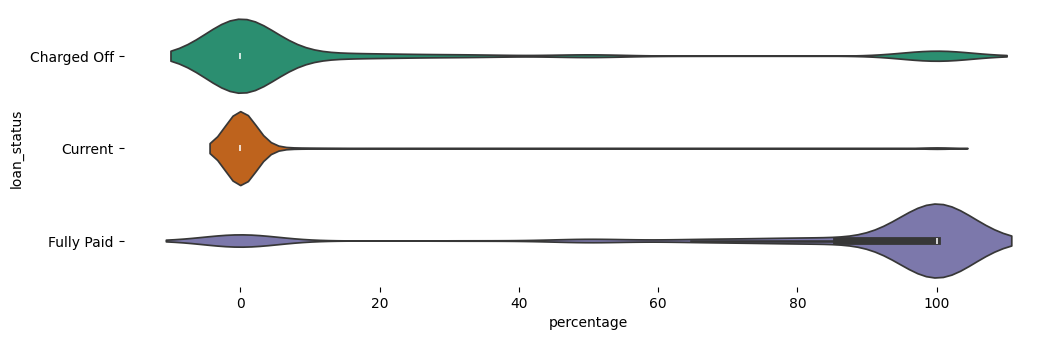

In [79]:
# @title loan_status vs percentage

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(loan_df_percent['loan_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(loan_df_percent, x='percentage', y='loan_status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [80]:
charged_off_loans.head()

,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,funded_amnt_inv_groups,issue_month,issue_year,installment_groups,funded_amnt_inv_group,dti_groups
1,2500.0,15.27,59,C,C4,0,RENT,30000.0,Source Verified,Dec-11,...,16%-20%,1-10,0-20,2-20,1k-31k,Dec,2011,0-100,0-5k,0-6
8,5600.0,21.28,152,F,F2,4,OWN,40000.0,Source Verified,Dec-11,...,26%-30%,11-20,20-40,2-20,1k-31k,Dec,2011,101-200,5k-10k,0-6
9,5350.0,12.69,121,B,B5,0,RENT,15000.0,Verified,Dec-11,...,11%-15%,1-10,20-40,2-20,1k-31k,Dec,2011,0-100,5k-10k,18-24
12,9000.0,13.49,305,C,C1,0,RENT,30000.0,Source Verified,Dec-11,...,16%-20%,1-10,80-100,2-20,32k-58k,Dec,2011,201-400,5k-10k,6-12
14,10000.0,10.65,325,B,B2,3,RENT,100000.0,Source Verified,Dec-11,...,11%-15%,11-20,40-60,20-37,32k-58k,Dec,2011,201-400,5k-10k,6-12


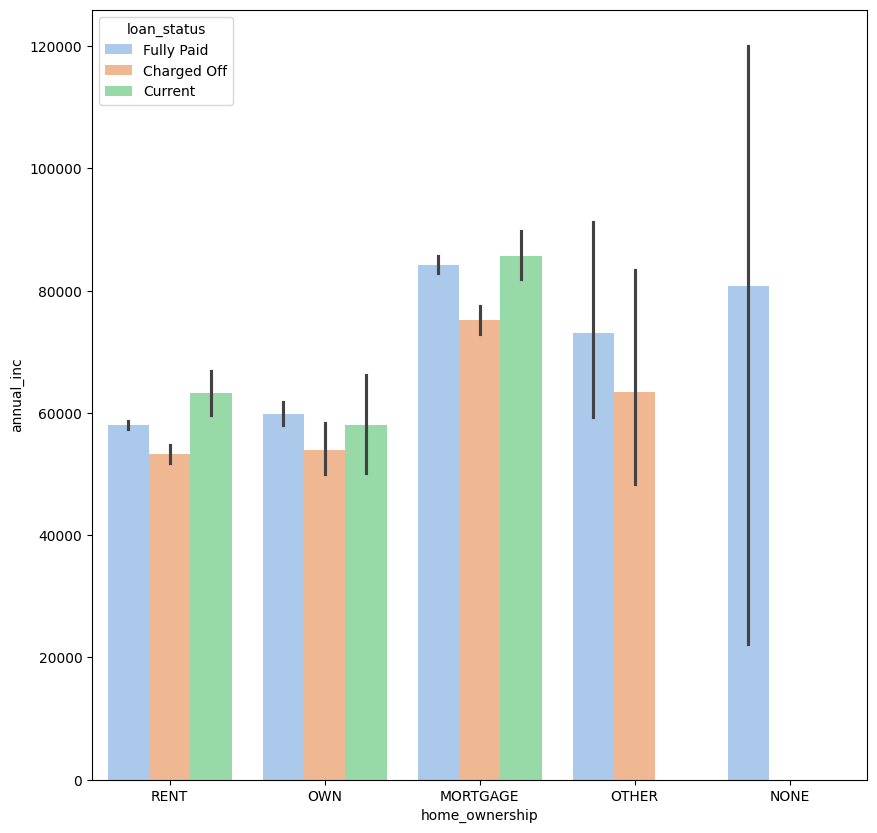

In [81]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

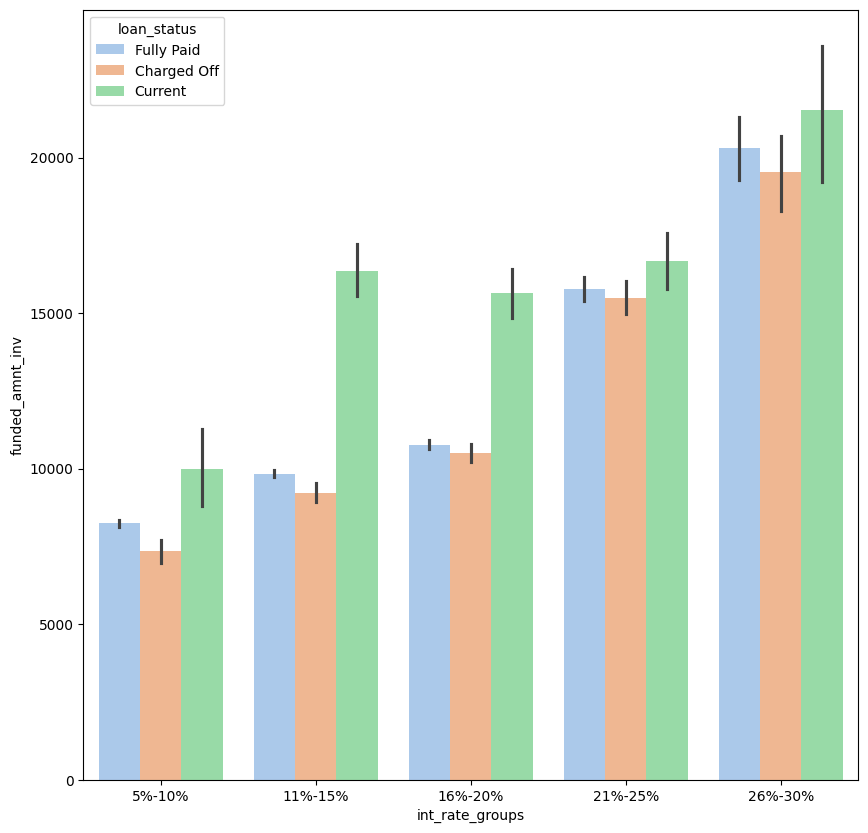

In [82]:
#Loan Amount vs int_rate
loan_df.columns
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='int_rate_groups', y='funded_amnt_inv', hue ='loan_status',palette="pastel")
plt.show()

#####Funded Amount Vs Purpose

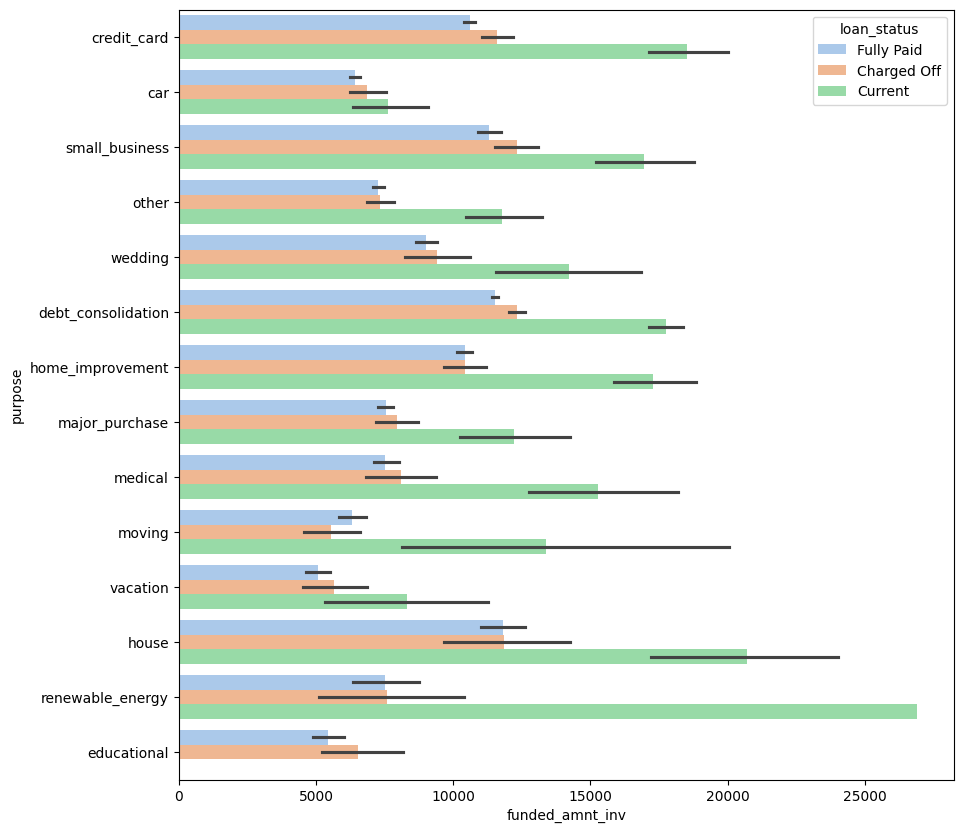

In [83]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='funded_amnt_inv', y='purpose', hue ='loan_status',palette="pastel")
plt.show()


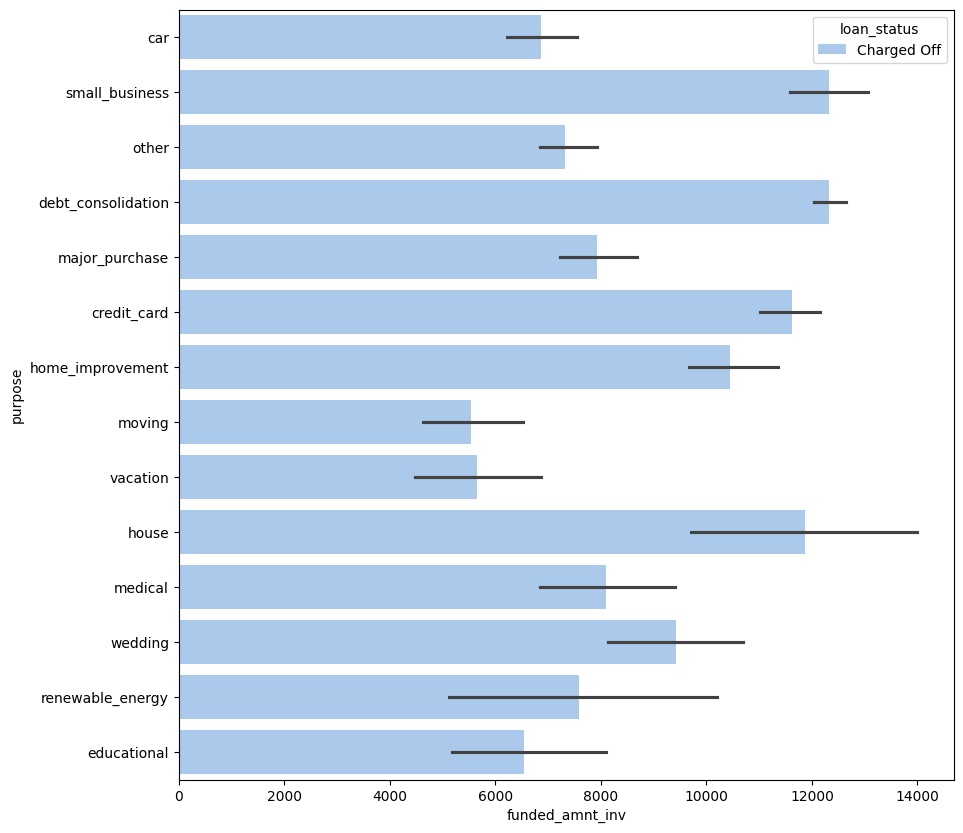

In [84]:
plt.figure(figsize=(10,10))
sns.barplot(data =charged_off_loans,x='funded_amnt_inv', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

<Axes: xlabel='issue_year', ylabel='funded_amnt_inv'>

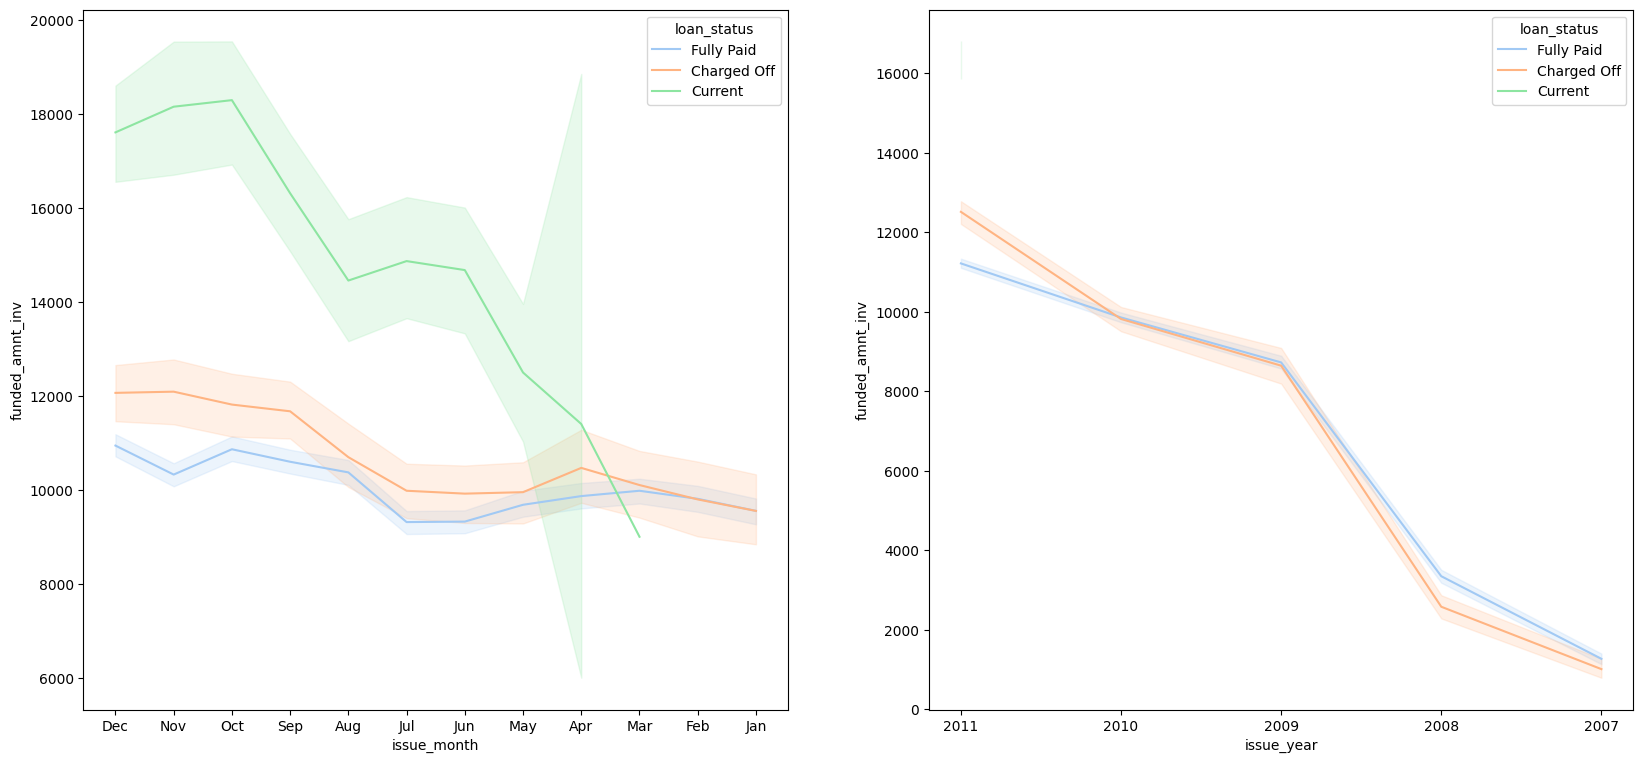

In [85]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_df,y='funded_amnt_inv', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_df,y='funded_amnt_inv', x='issue_year', hue ='loan_status',palette="pastel")


In [86]:
#Grade V/s Interest

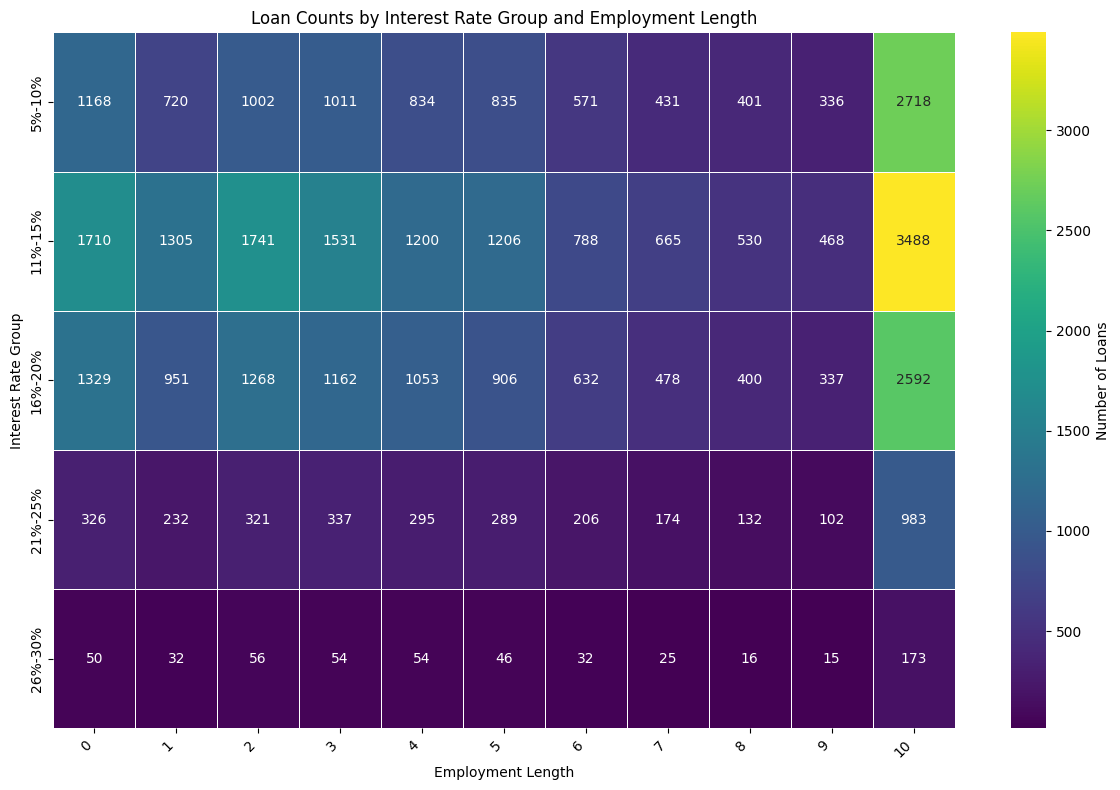

In [87]:

# Group the data and calculate the count of charged-off loans for each group
grouped_data = loan_df.groupby(['int_rate_groups', 'emp_length'])['loan_status'].count().reset_index()
grouped_data = grouped_data.rename(columns={'loan_status': 'count'})

# Create the heatmap using seaborn
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(
    grouped_data.pivot(index='int_rate_groups', columns='emp_length', values='count'),
    annot=True,  # Show values in the heatmap cells
    cmap='viridis',  # Choose a colormap
    fmt='d',  # Format for displaying values as integers
    linewidths=0.5,  # Add lines between cells
    cbar_kws={'label': 'Number of Loans'}  # Label for the colorbar
)
plt.title('Loan Counts by Interest Rate Group and Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Interest Rate Group')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

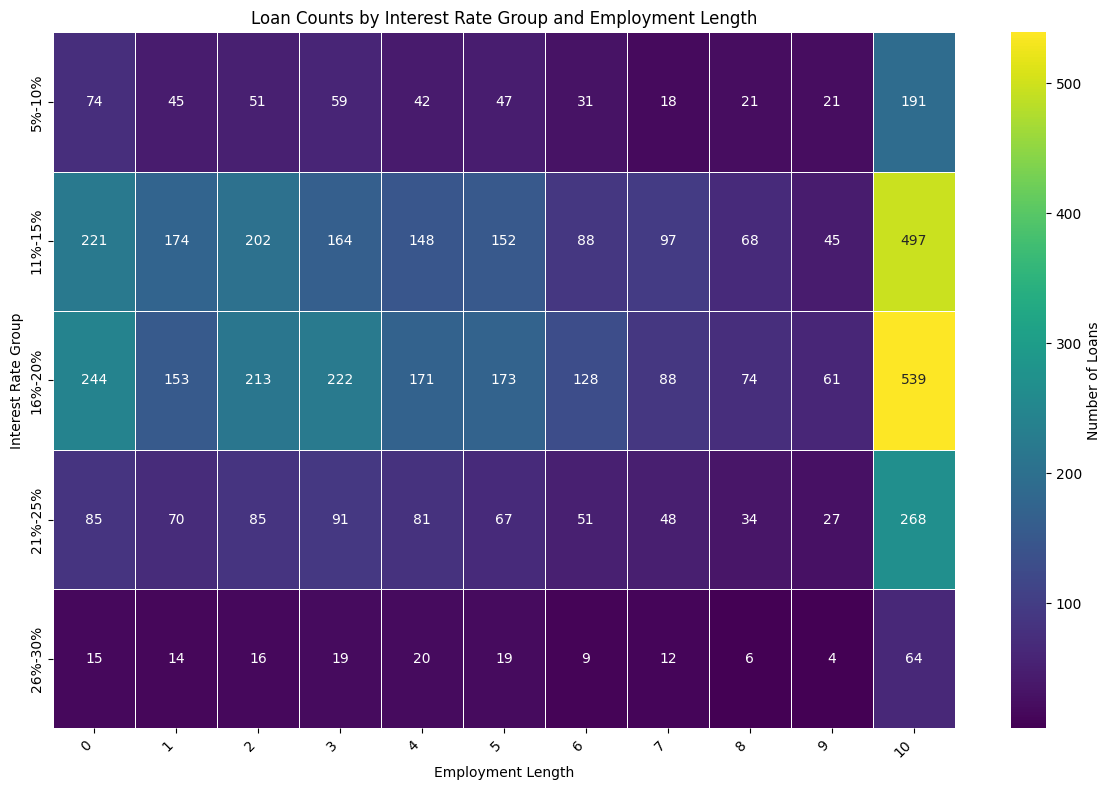

In [89]:
# Group the data and calculate the count of charged-off loans for each group
grouped_data = charged_off_loans.groupby(['int_rate_groups', 'emp_length'])['loan_status'].count().reset_index()
grouped_data = grouped_data.rename(columns={'loan_status': 'count'})

# Create the heatmap using seaborn
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(
    grouped_data.pivot(index='int_rate_groups', columns='emp_length', values='count'),
    annot=True,  # Show values in the heatmap cells
    cmap='viridis',  # Choose a colormap
    fmt='d',  # Format for displaying values as integers
    linewidths=0.5,  # Add lines between cells
    cbar_kws={'label': 'Number of Loans'}  # Label for the colorbar
)
plt.title('Loan Counts by Interest Rate Group and Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Interest Rate Group')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#Observation

1. Loan given in Dec Month has highest risk esp in the year 2011 Dec month applicants has highest risk of default

2. Loans given with funding amount <10k has highest risk, we should do through validation before given low value risk

3. Home Improvement, Credit Card and debt consolidation loan given below a certain threshold have clear indication of default
4. Based on home owership , customer who stay in mortage house and have income range from 70-80k have high risk of default
5. Higher the funding amount, higher the interest rate, however highest risk is when int rate is btw 15-16%
6. When loan is taken for small business , debt reconsolidation , house have a risk of loan defaulting
7. Loan when given to applicants with 10+ years employment exp and rate of interest 16-20% the risk of defaulting is higher.

In [88]:
# prompt: I want to Exploratory data analysis on the Loan Data Frame, review the data frame and Lets do the EDA Step by step

# Display basic information about the DataFrame
print(loan_df.info())

# Display the first few rows of the DataFrame
print(loan_df.head())

# Display descriptive statistics for numerical columns
print(loan_df.describe())

# Check for missing values
print(loan_df.isnull().sum())

# Explore categorical features (example: loan_status)
print(loan_df['loan_status'].value_counts())

# Visualizations (example: histogram of loan amounts)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(loan_df['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Explore relationships between variables (example: scatter plot of loan amount vs. interest rate)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_df)
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

#Further analysis can be performed based on the specific insights needed

# Example: Analyze loan status by grade
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', hue='loan_status', data=loan_df)
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


# More detailed explorations of individual columns:
# Calculate the mean loan amount for each grade
print(loan_df.groupby('grade')['loan_amnt'].mean())

# Handle missing values
# Identify the columns with null values
null_columns = loan_df.columns[loan_df.isnull().any()]

for col in null_columns:
  print(f"Null values in '{col}': {loan_df[col].isnull().sum()}")

# Decide on the best method to handle null values for each column
# Examples:
# 1. Remove rows with missing values (if the proportion of missing values is small)
# loan_df = loan_df.dropna(subset=['column_name'])

# 2. Fill with the mean, median or mode
# loan_df['column_name'].fillna(loan_df['column_name'].mean(), inplace=True)

# 3. Fill with a constant value
# loan_df['column_name'].fillna(0, inplace=True)

# 4. Use imputation techniques (e.g., KNN Imputer)
from sklearn.impute import KNNImputer

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5) # You may adjust n_neighbors as needed

# Apply imputation to selected columns
loan_df[null_columns] = imputer.fit_transform(loan_df[null_columns])

# Check for missing values after handling nulls
print(loan_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   funded_amnt_inv         39717 non-null  float64 
 1   int_rate                39717 non-null  float64 
 2   installment             39717 non-null  int64   
 3   grade                   39717 non-null  object  
 4   sub_grade               39717 non-null  object  
 5   emp_length              39717 non-null  int64   
 6   home_ownership          39717 non-null  object  
 7   annual_inc              39717 non-null  float64 
 8   verification_status     39717 non-null  object  
 9   issue_d                 39717 non-null  object  
 10  loan_status             39717 non-null  object  
 11  purpose                 39717 non-null  object  
 12  zip_code                39717 non-null  object  
 13  addr_state              39717 non-null  object  
 14  dti                   

KeyError: 'loan_amnt'

<Figure size 1000x600 with 0 Axes>